In [299]:
# Import the warnings module to manage warnings
import warnings
warnings.filterwarnings('ignore')

In [300]:
# Importing NumPy, Pandas, Matplotlib, and Seaborn imported for the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Step 1: Import Data

In [301]:
# Reading the data from the CSV file into a Pandas DataFrame
boomBikes = pd.read_csv("day.csv")

#Step 2: EDA - Exploratory data analysis


In [302]:
# Checking the shape of the boomBikes DataFrame
boomBikes.shape

(730, 16)

In [303]:
#  Displaying the first few rows of the boomBikes DataFrame
boomBikes.head()

instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  01-01-2018       1   0     1        0        1           1   
1        2  02-01-2018       1   0     1        0        2           1   
2        3  03-01-2018       1   0     1        0        3           1   
3        4  04-01-2018       1   0     1        0        4           1   
4        5  05-01-2018       1   0     1        0        5           1   

   weathersit       temp     atemp      hum  windspeed  casual  registered  \
0           2  14.110847  18.18125  80.5833  10.749882     331         654   
1           2  14.902598  17.68695  69.6087  16.652113     131         670   
2           1   8.050924   9.47025  43.7273  16.636703     120        1229   
3           1   8.200000  10.60610  59.0435  10.739832     108        1454   
4           1   9.305237  11.46350  43.6957  12.522300      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600

In [304]:
# Providing a summary of the boomBikes DataFrame's structure and data types
boomBikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [305]:
# Calculating the number of missing values for each column in the boomBikes DataFrame
boomBikes.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [306]:
# Generating descriptive statistics for the numerical columns in the boomBikes DataFrame
boomBikes.describe()

instant      season          yr        mnth     holiday     weekday  \
count  730.000000  730.000000  730.000000  730.000000  730.000000  730.000000   
mean   365.500000    2.498630    0.500000    6.526027    0.028767    2.995890   
std    210.877136    1.110184    0.500343    3.450215    0.167266    2.000339   
min      1.000000    1.000000    0.000000    1.000000    0.000000    0.000000   
25%    183.250000    2.000000    0.000000    4.000000    0.000000    1.000000   
50%    365.500000    3.000000    0.500000    7.000000    0.000000    3.000000   
75%    547.750000    3.000000    1.000000   10.000000    0.000000    5.000000   
max    730.000000    4.000000    1.000000   12.000000    1.000000    6.000000   

       workingday  weathersit        temp       atemp         hum   windspeed  \
count  730.000000  730.000000  730.000000  730.000000  730.000000  730.000000   
mean     0.690411    1.394521   20.319259   23.726322   62.765175   12.763620   
std      0.462641    0.544807    7.506729    8.150308   14.237589    5.195841   
min      0.000000    1.000000    2.424346    3.953480    0.000000    1.500244   
25%      0.000000    1.000000   13.811885   16.889713   52.000000    9.041650   
50%      1.000000    1.000000   20.465826   24.368225   62.625000   12.125325   
75%      1.000000    2.000000   26.880615   30.445775   72.989575   15.625589   
max      1.000000    3.000000   35.328347   42.044800   97.250000   34.000021   

            casual   registered          cnt  
count   730.000000   730.000000   730.000000  
mean    849.249315  3658.757534  4508.006849  
std     686.479875  1559.758728  1936.011647  
min       2.000000    20.000000    22.000000  
25%     316.250000  2502.250000  3169.750000  
50%     717.000000  3664.500000  4548.500000  
75%    1096.500000  4783.250000  5966.000000  
max    3410.000000  6946.000000  8714.000000

# Univariate Analysis


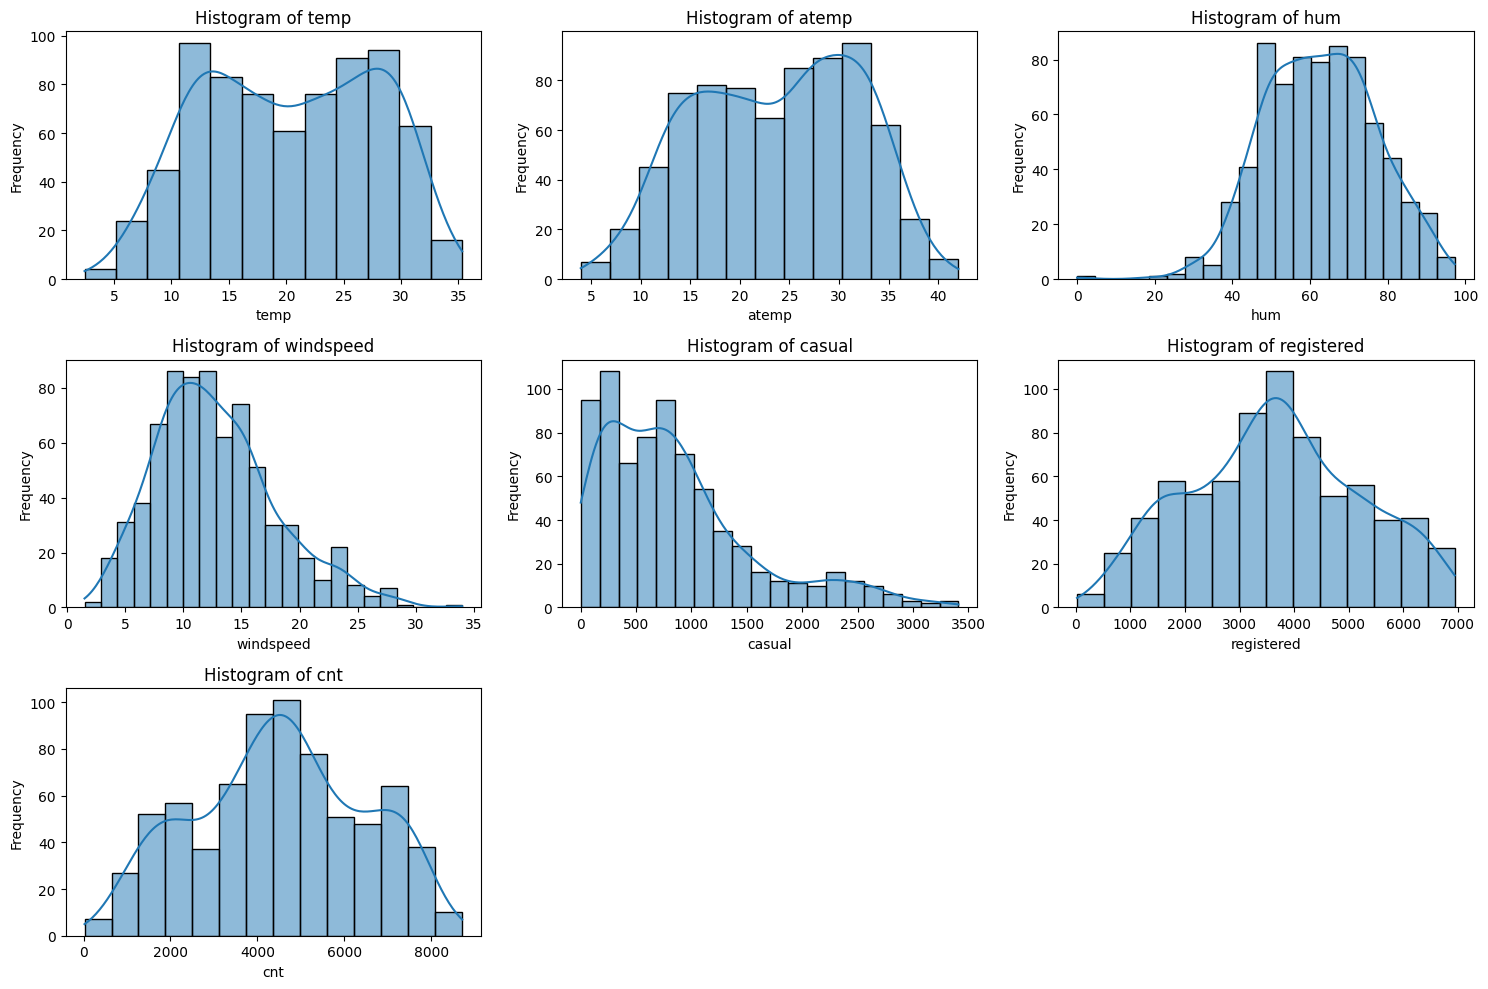

In [307]:
numerical_cols = ['temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']
plt.figure(figsize=(15, 10))

for i, col in enumerate(numerical_cols, 1):
    plt.subplot(3, 3, i)
    sns.histplot(boomBikes[col], kde=True)
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

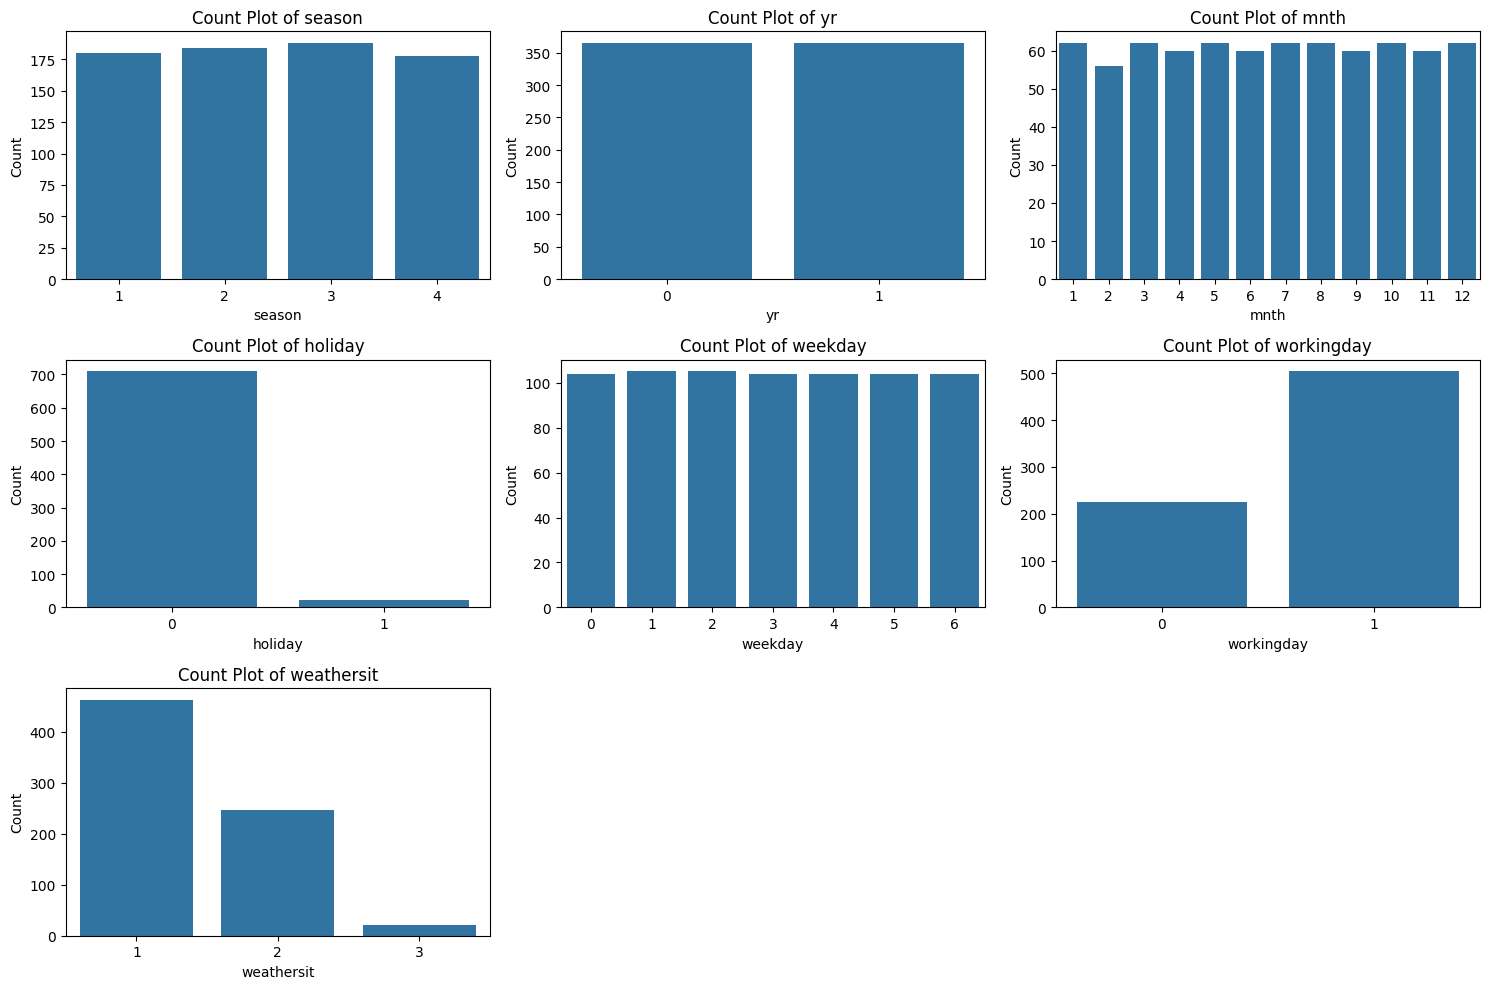

In [308]:
categorical_cols = ['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']
plt.figure(figsize=(15, 10))

for i, col in enumerate(categorical_cols, len(numerical_cols) + 1):
    plt.subplot(3, 3, i - len(numerical_cols))
    sns.countplot(x=col, data=boomBikes)
    plt.title(f'Count Plot of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')

plt.tight_layout()
plt.show()

# Bivariate Analysis

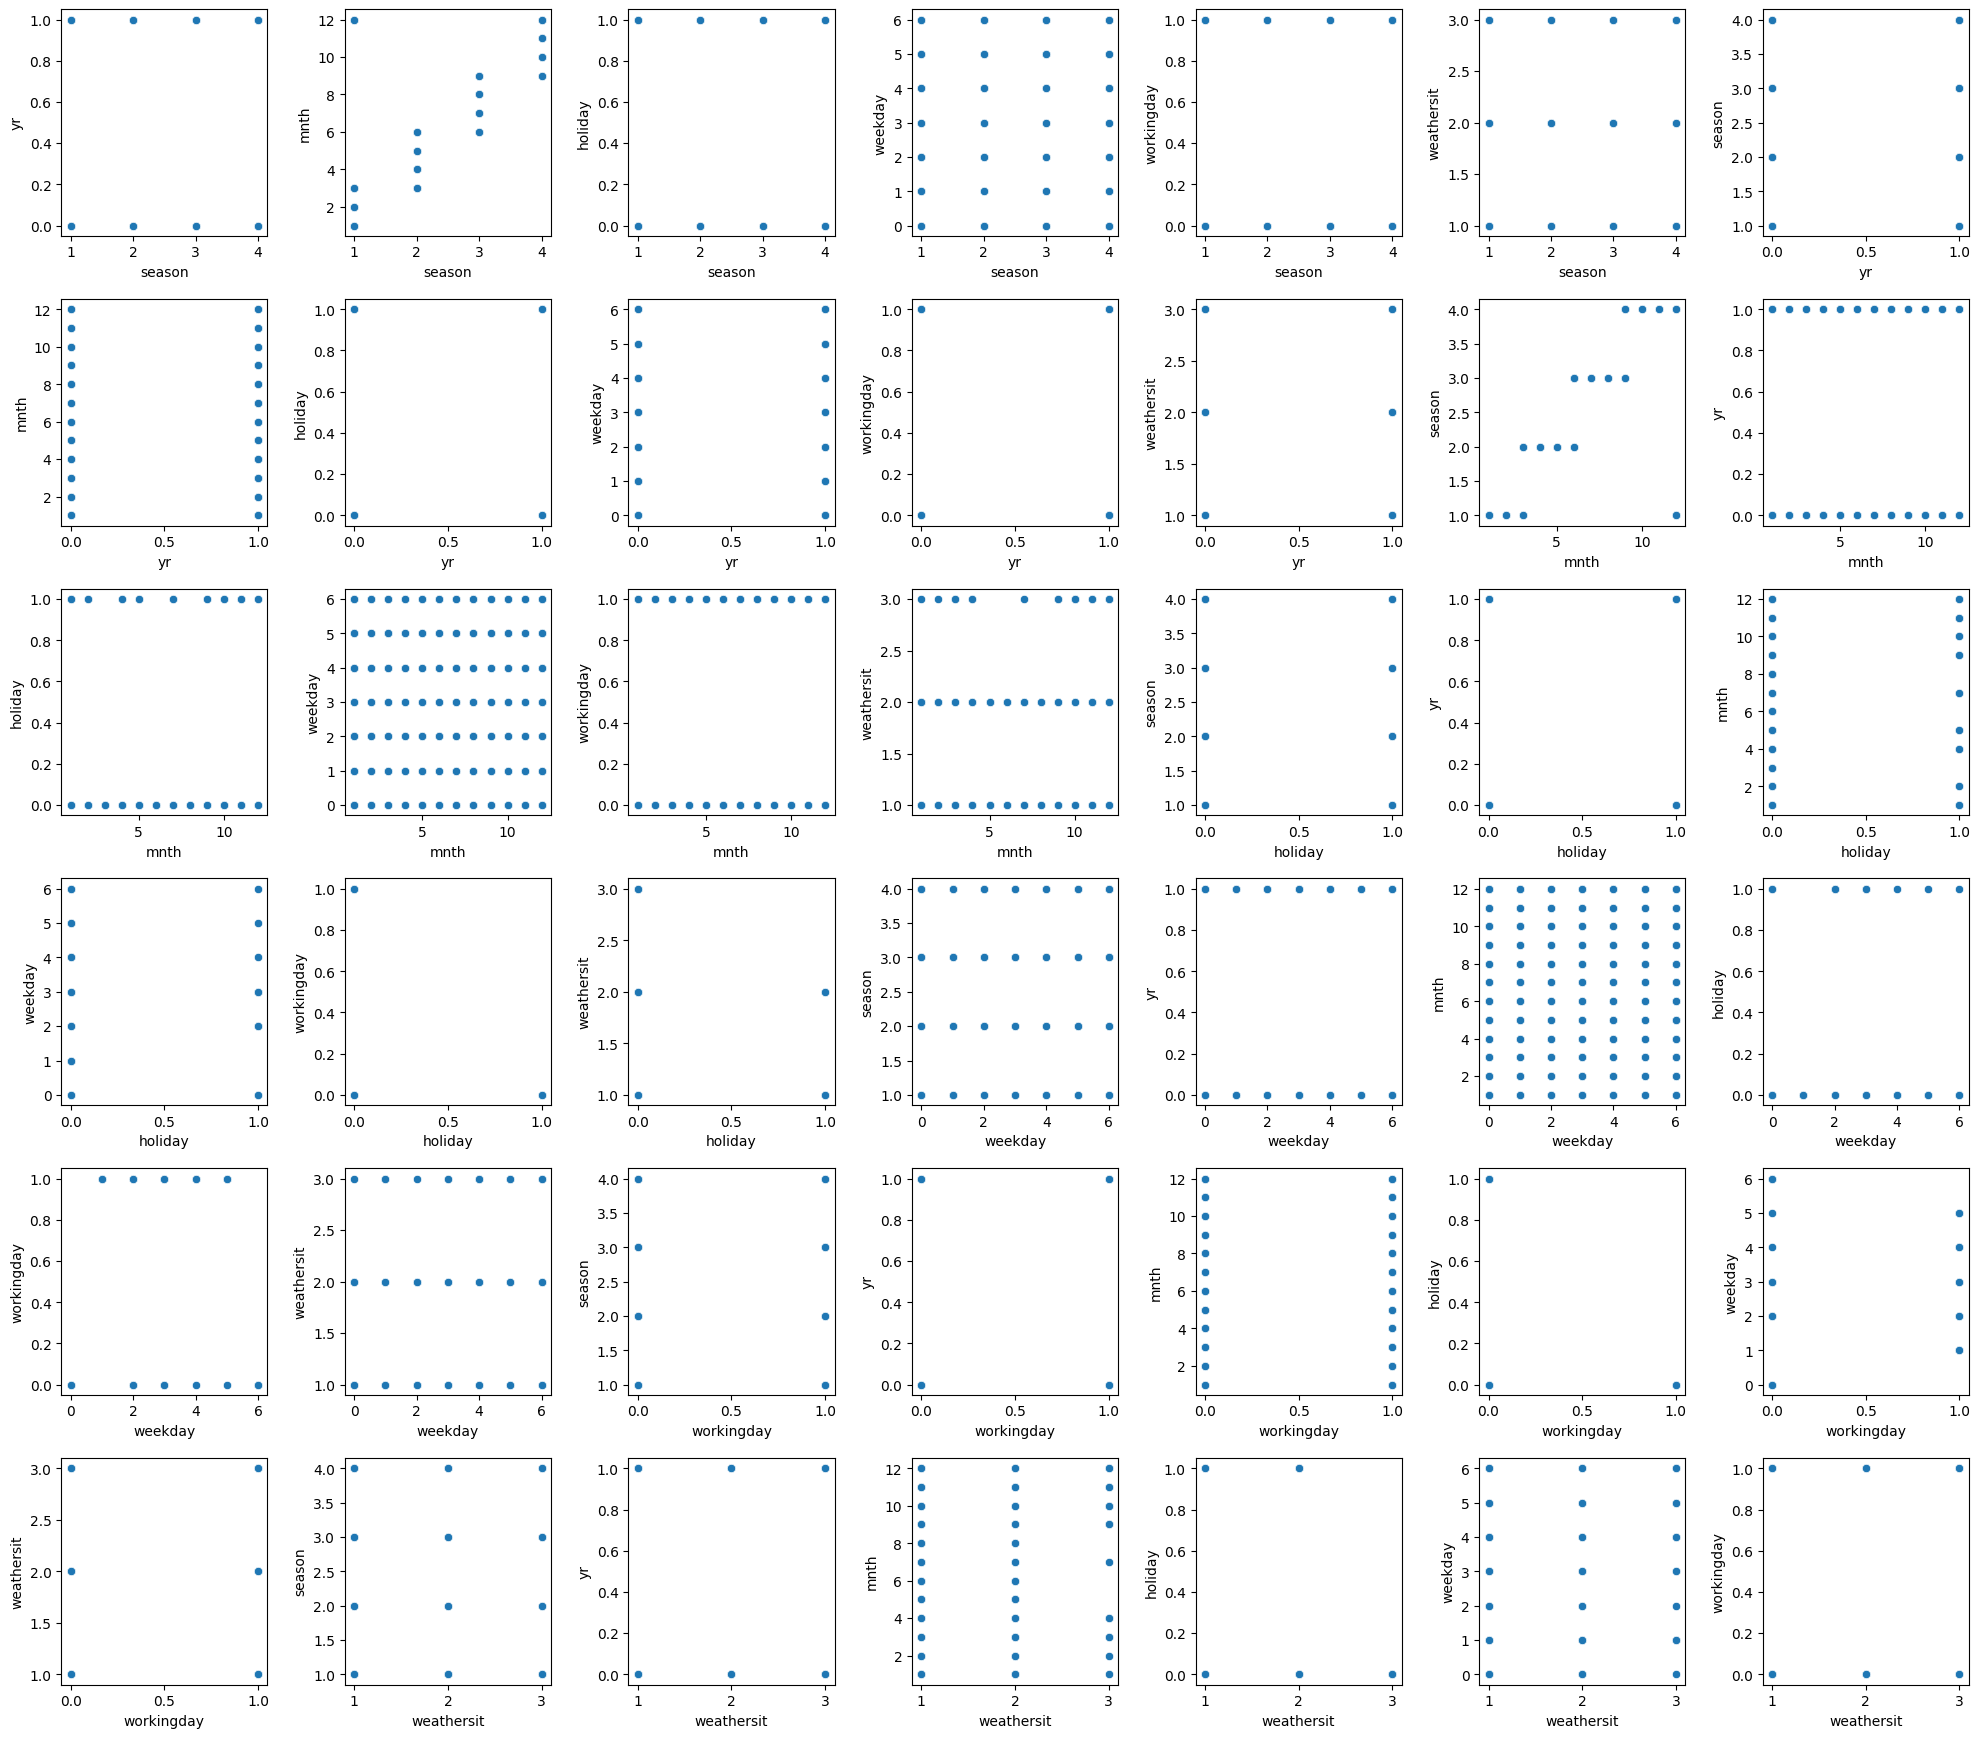

In [309]:
# categorical vs. categorical
plt.figure(figsize=(20, 20))
plot_index = 1
for i, col1 in enumerate(categorical_cols):
    for j, col2 in enumerate(categorical_cols):
        if col1 != col2:
            plt.subplot(len(categorical_cols), len(categorical_cols), plot_index)
            sns.scatterplot(x=col1, y=col2, data=boomBikes)
            plt.xlabel(col1)
            plt.ylabel(col2)
            plot_index += 1

plt.tight_layout()
plt.show()

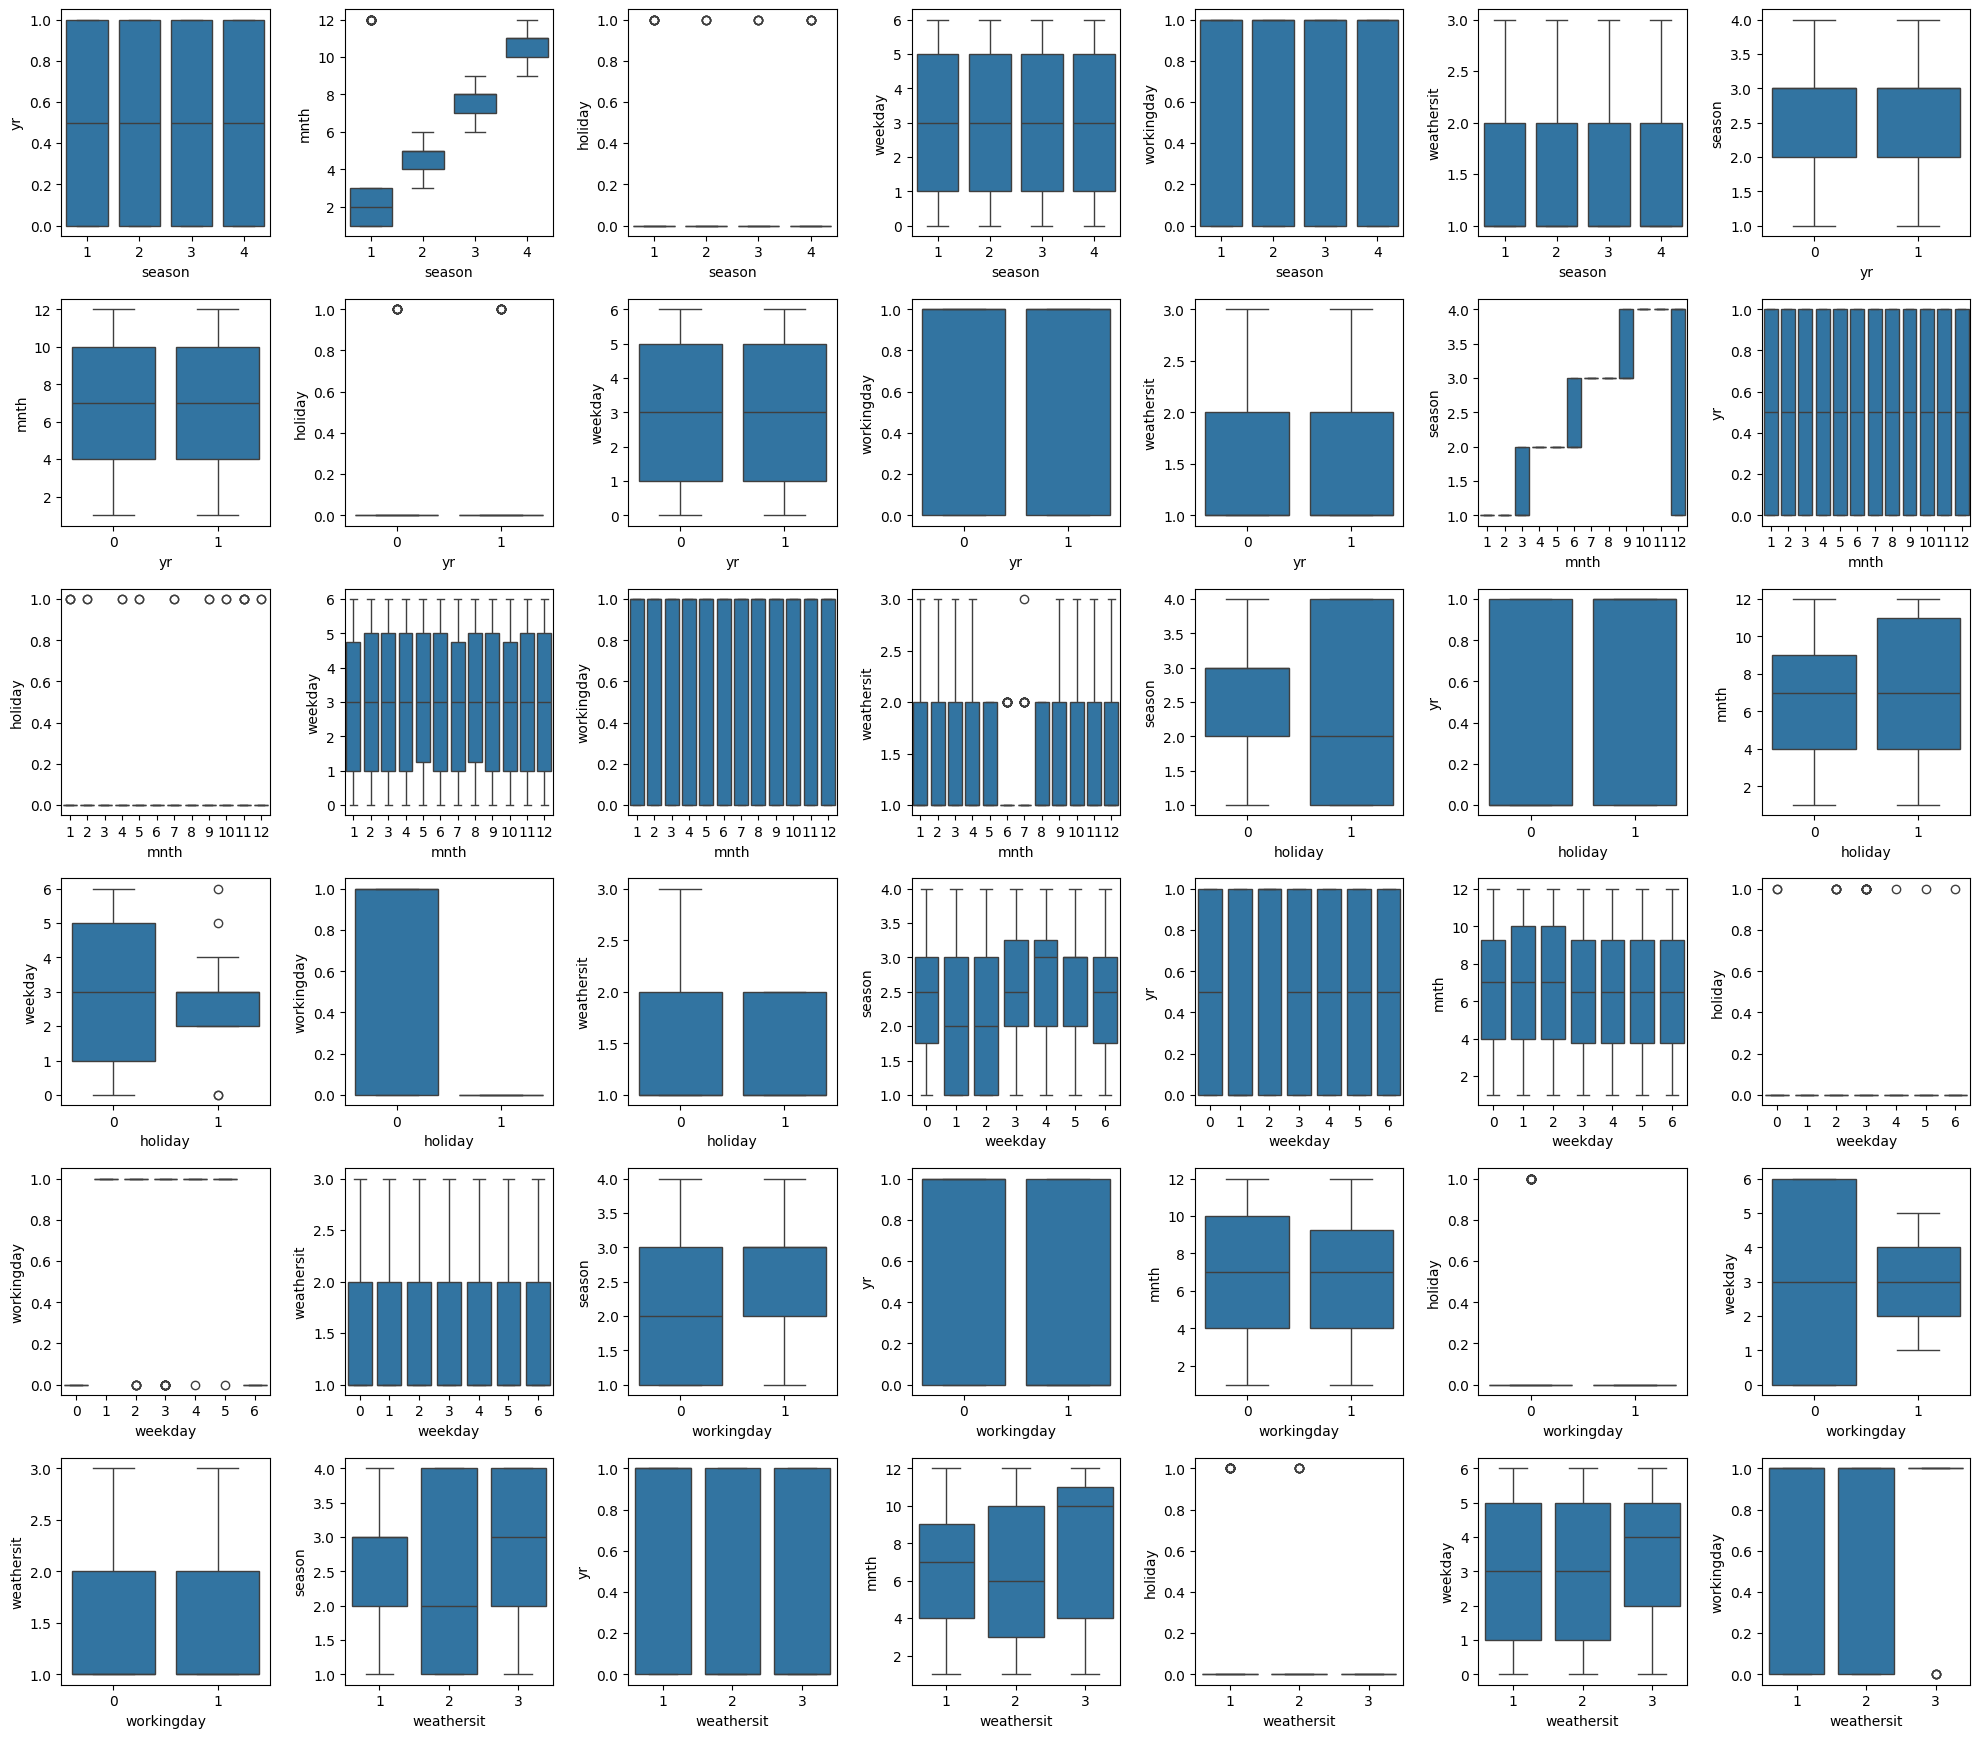

In [310]:
# categorical vs. categorical
plt.figure(figsize=(20, 20))
plot_index = 1
for i, col1 in enumerate(categorical_cols):
    for j, col2 in enumerate(categorical_cols):
        if col1 != col2:
            plt.subplot(len(categorical_cols), len(categorical_cols), plot_index)
            sns.boxplot(x=col1, y=col2, data=boomBikes)
            plt.xlabel(col1)
            plt.ylabel(col2)
            plot_index += 1

plt.tight_layout()
plt.show()

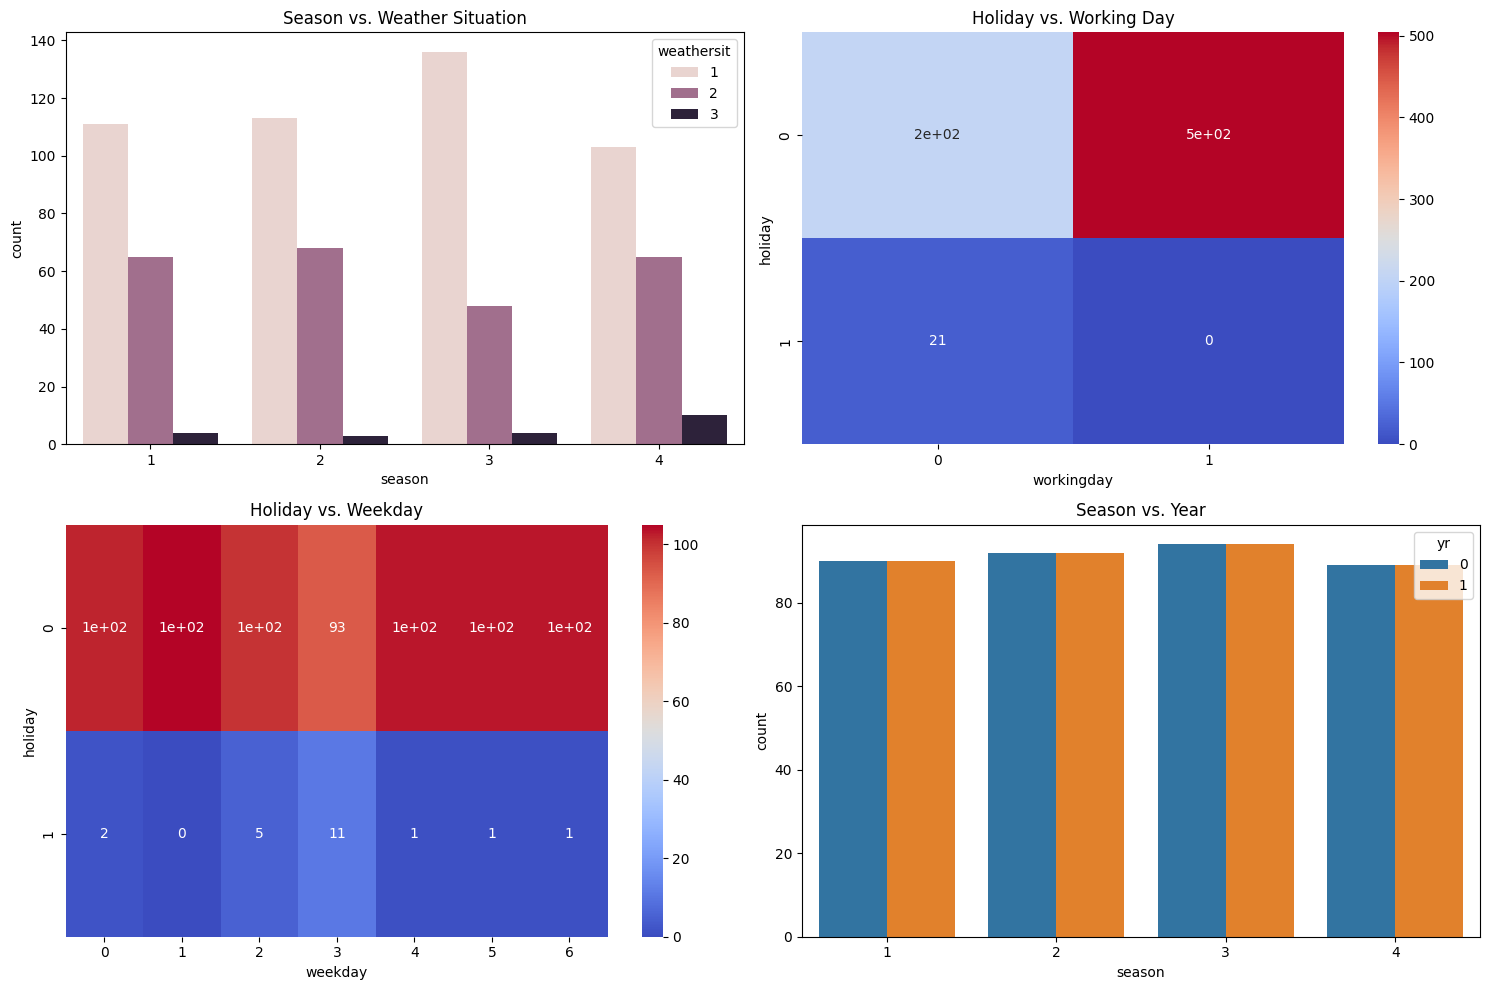

In [311]:
#  Categorical vs. Categorical
plt.figure(figsize=(15, 10))

# Subplot 1: Season vs. Weather Situation
plt.subplot(2, 2, 1)
sns.countplot(x='season', hue='weathersit', data=boomBikes)
plt.title('Season vs. Weather Situation')

# Subplot 2: Holiday vs. Working Day
plt.subplot(2, 2, 2)
sns.heatmap(pd.crosstab(boomBikes['holiday'], boomBikes['workingday']), annot=True, cmap='coolwarm')
plt.title('Holiday vs. Working Day')

# Subplot 3: Holiday vs. weekend Day
plt.subplot(2, 2, 3)
sns.heatmap(pd.crosstab(boomBikes['holiday'], boomBikes['weekday']), annot=True, cmap='coolwarm')
plt.title('Holiday vs. Weekday')

# Subplot 4: Season vs. Year
plt.subplot(2, 2, 4)
sns.countplot(x='season', hue='yr', data=boomBikes)
plt.title('Season vs. Year')

plt.tight_layout()
plt.show()

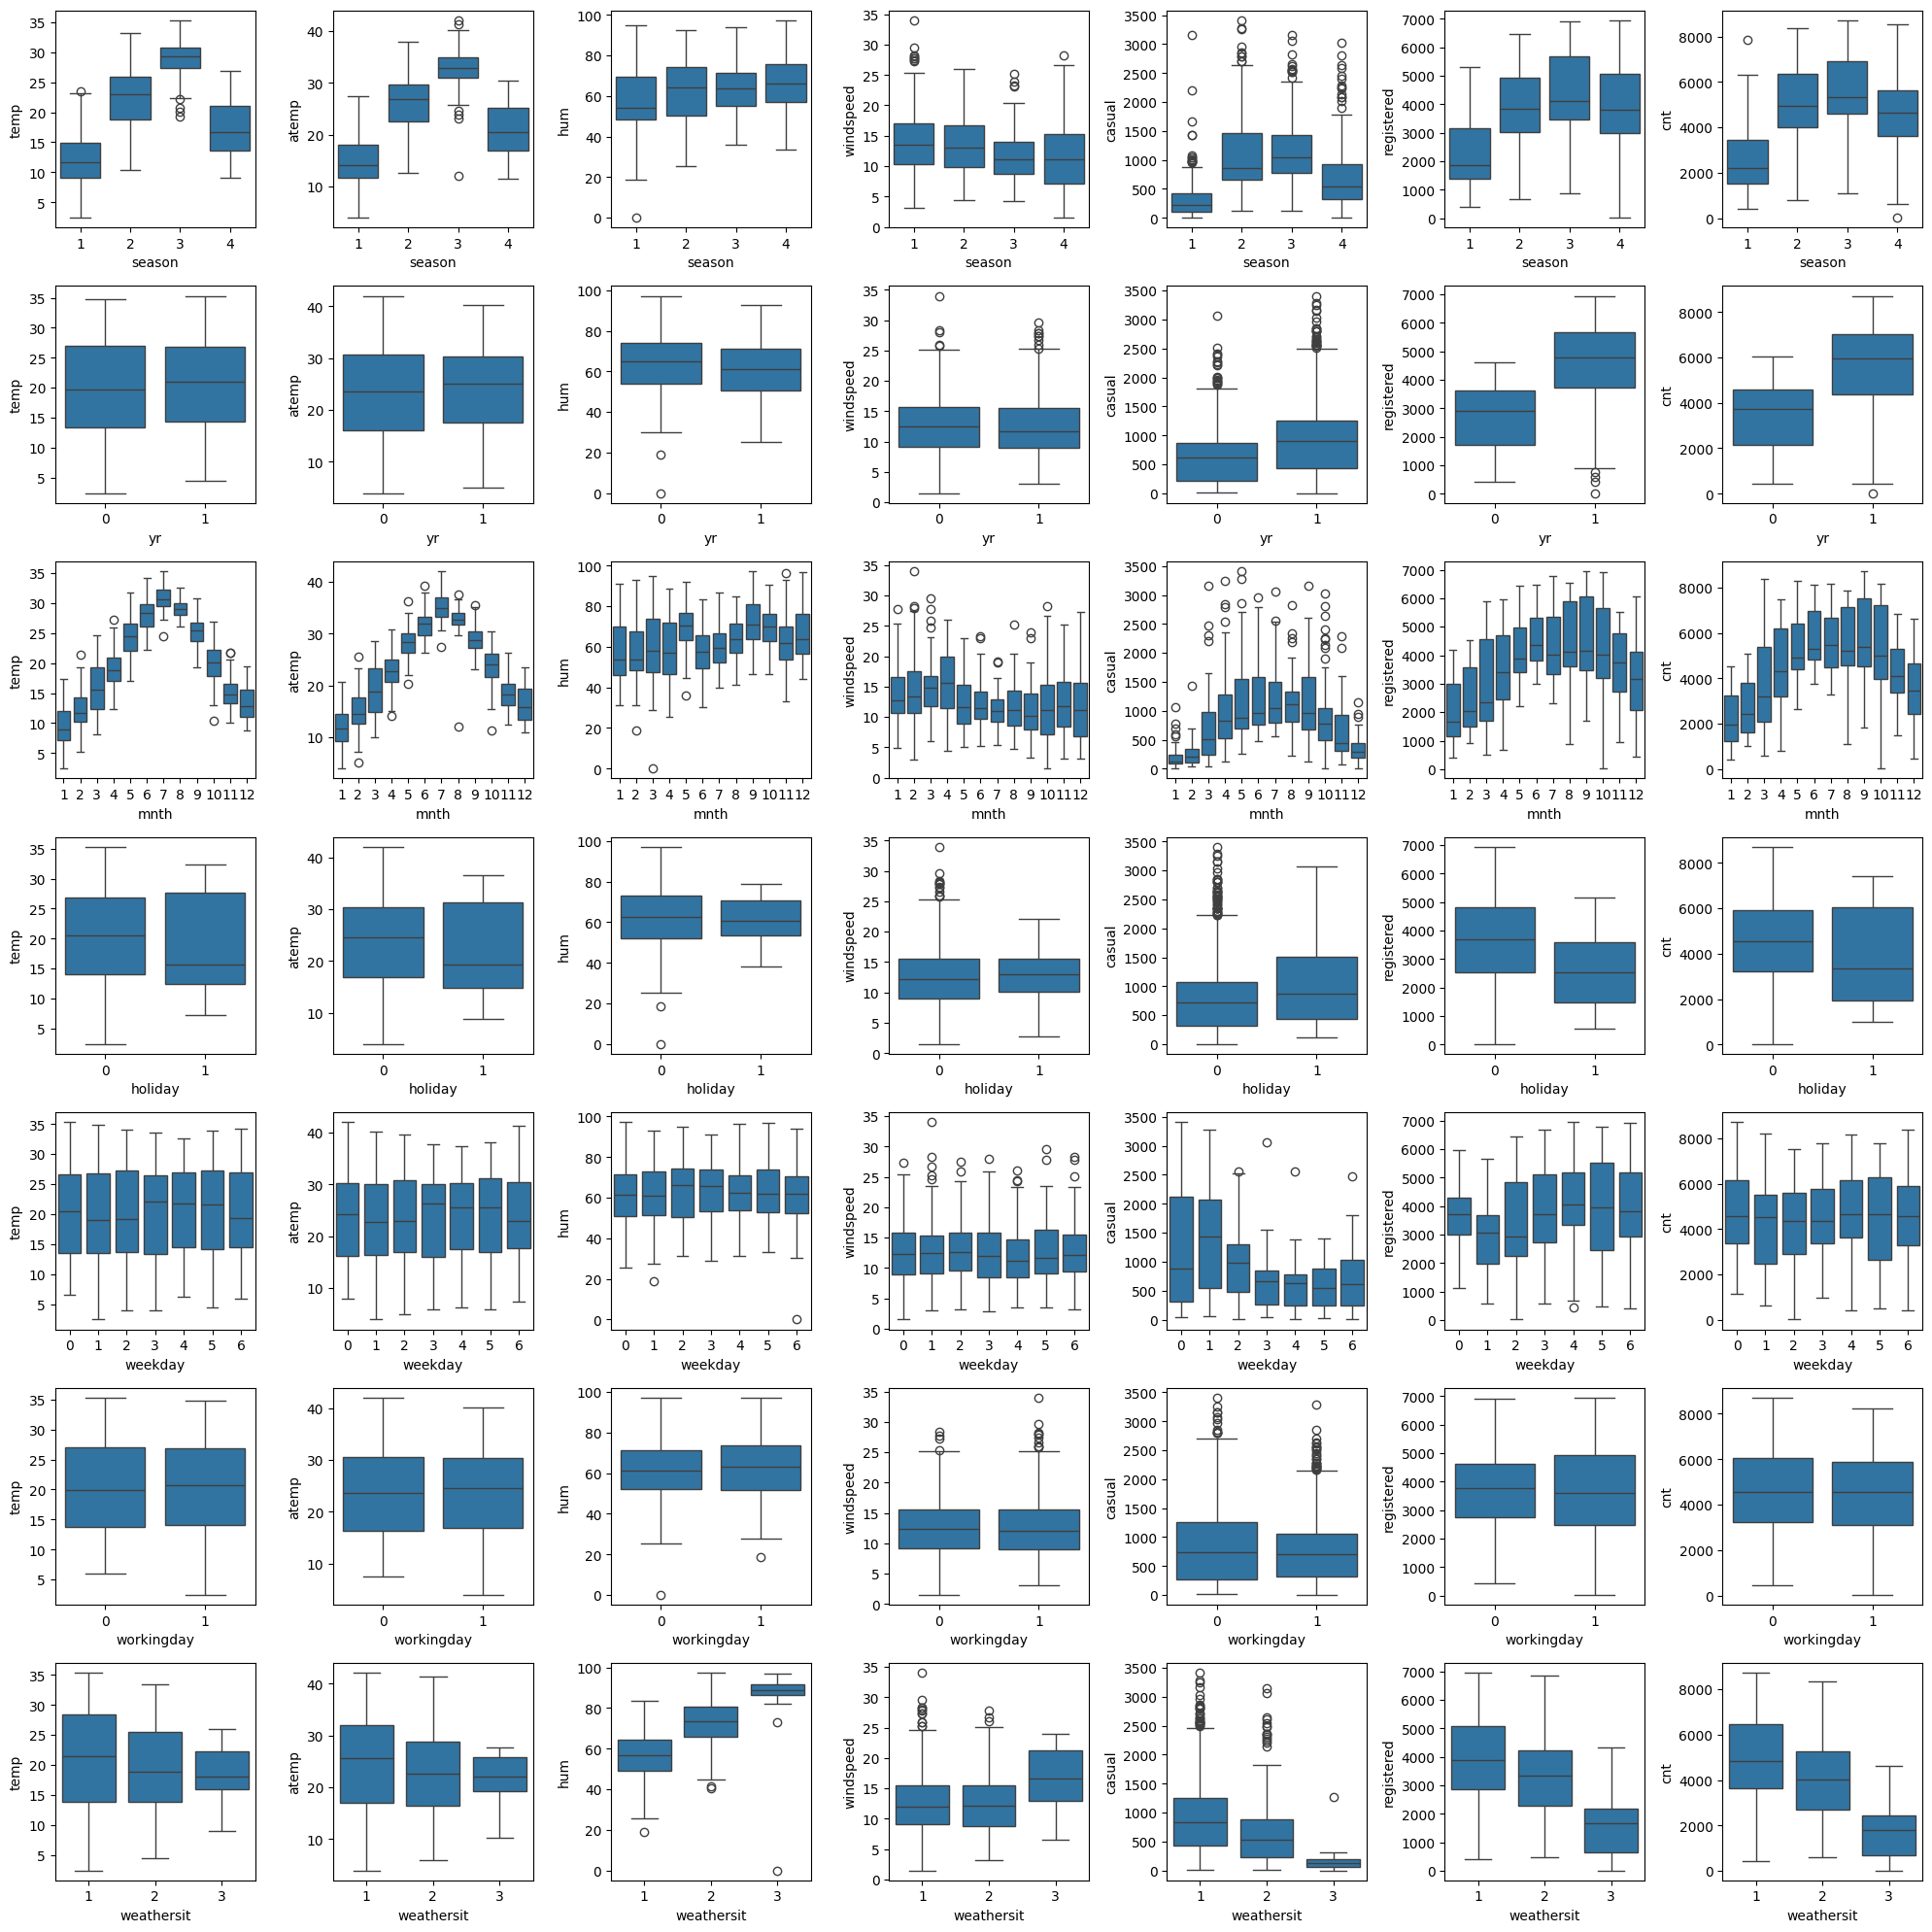

In [312]:
# 2. Categorical vs. Numerical
plt.figure(figsize=(20, 20))
plot_index = 1

for col1 in categorical_cols:
    for col2 in numerical_cols:
        plt.subplot(len(categorical_cols), len(numerical_cols), plot_index)
        sns.boxplot(x=col1, y=col2, data=boomBikes)
        plt.xlabel(col1)
        plt.ylabel(col2)
        plot_index += 1

plt.tight_layout()
plt.show()

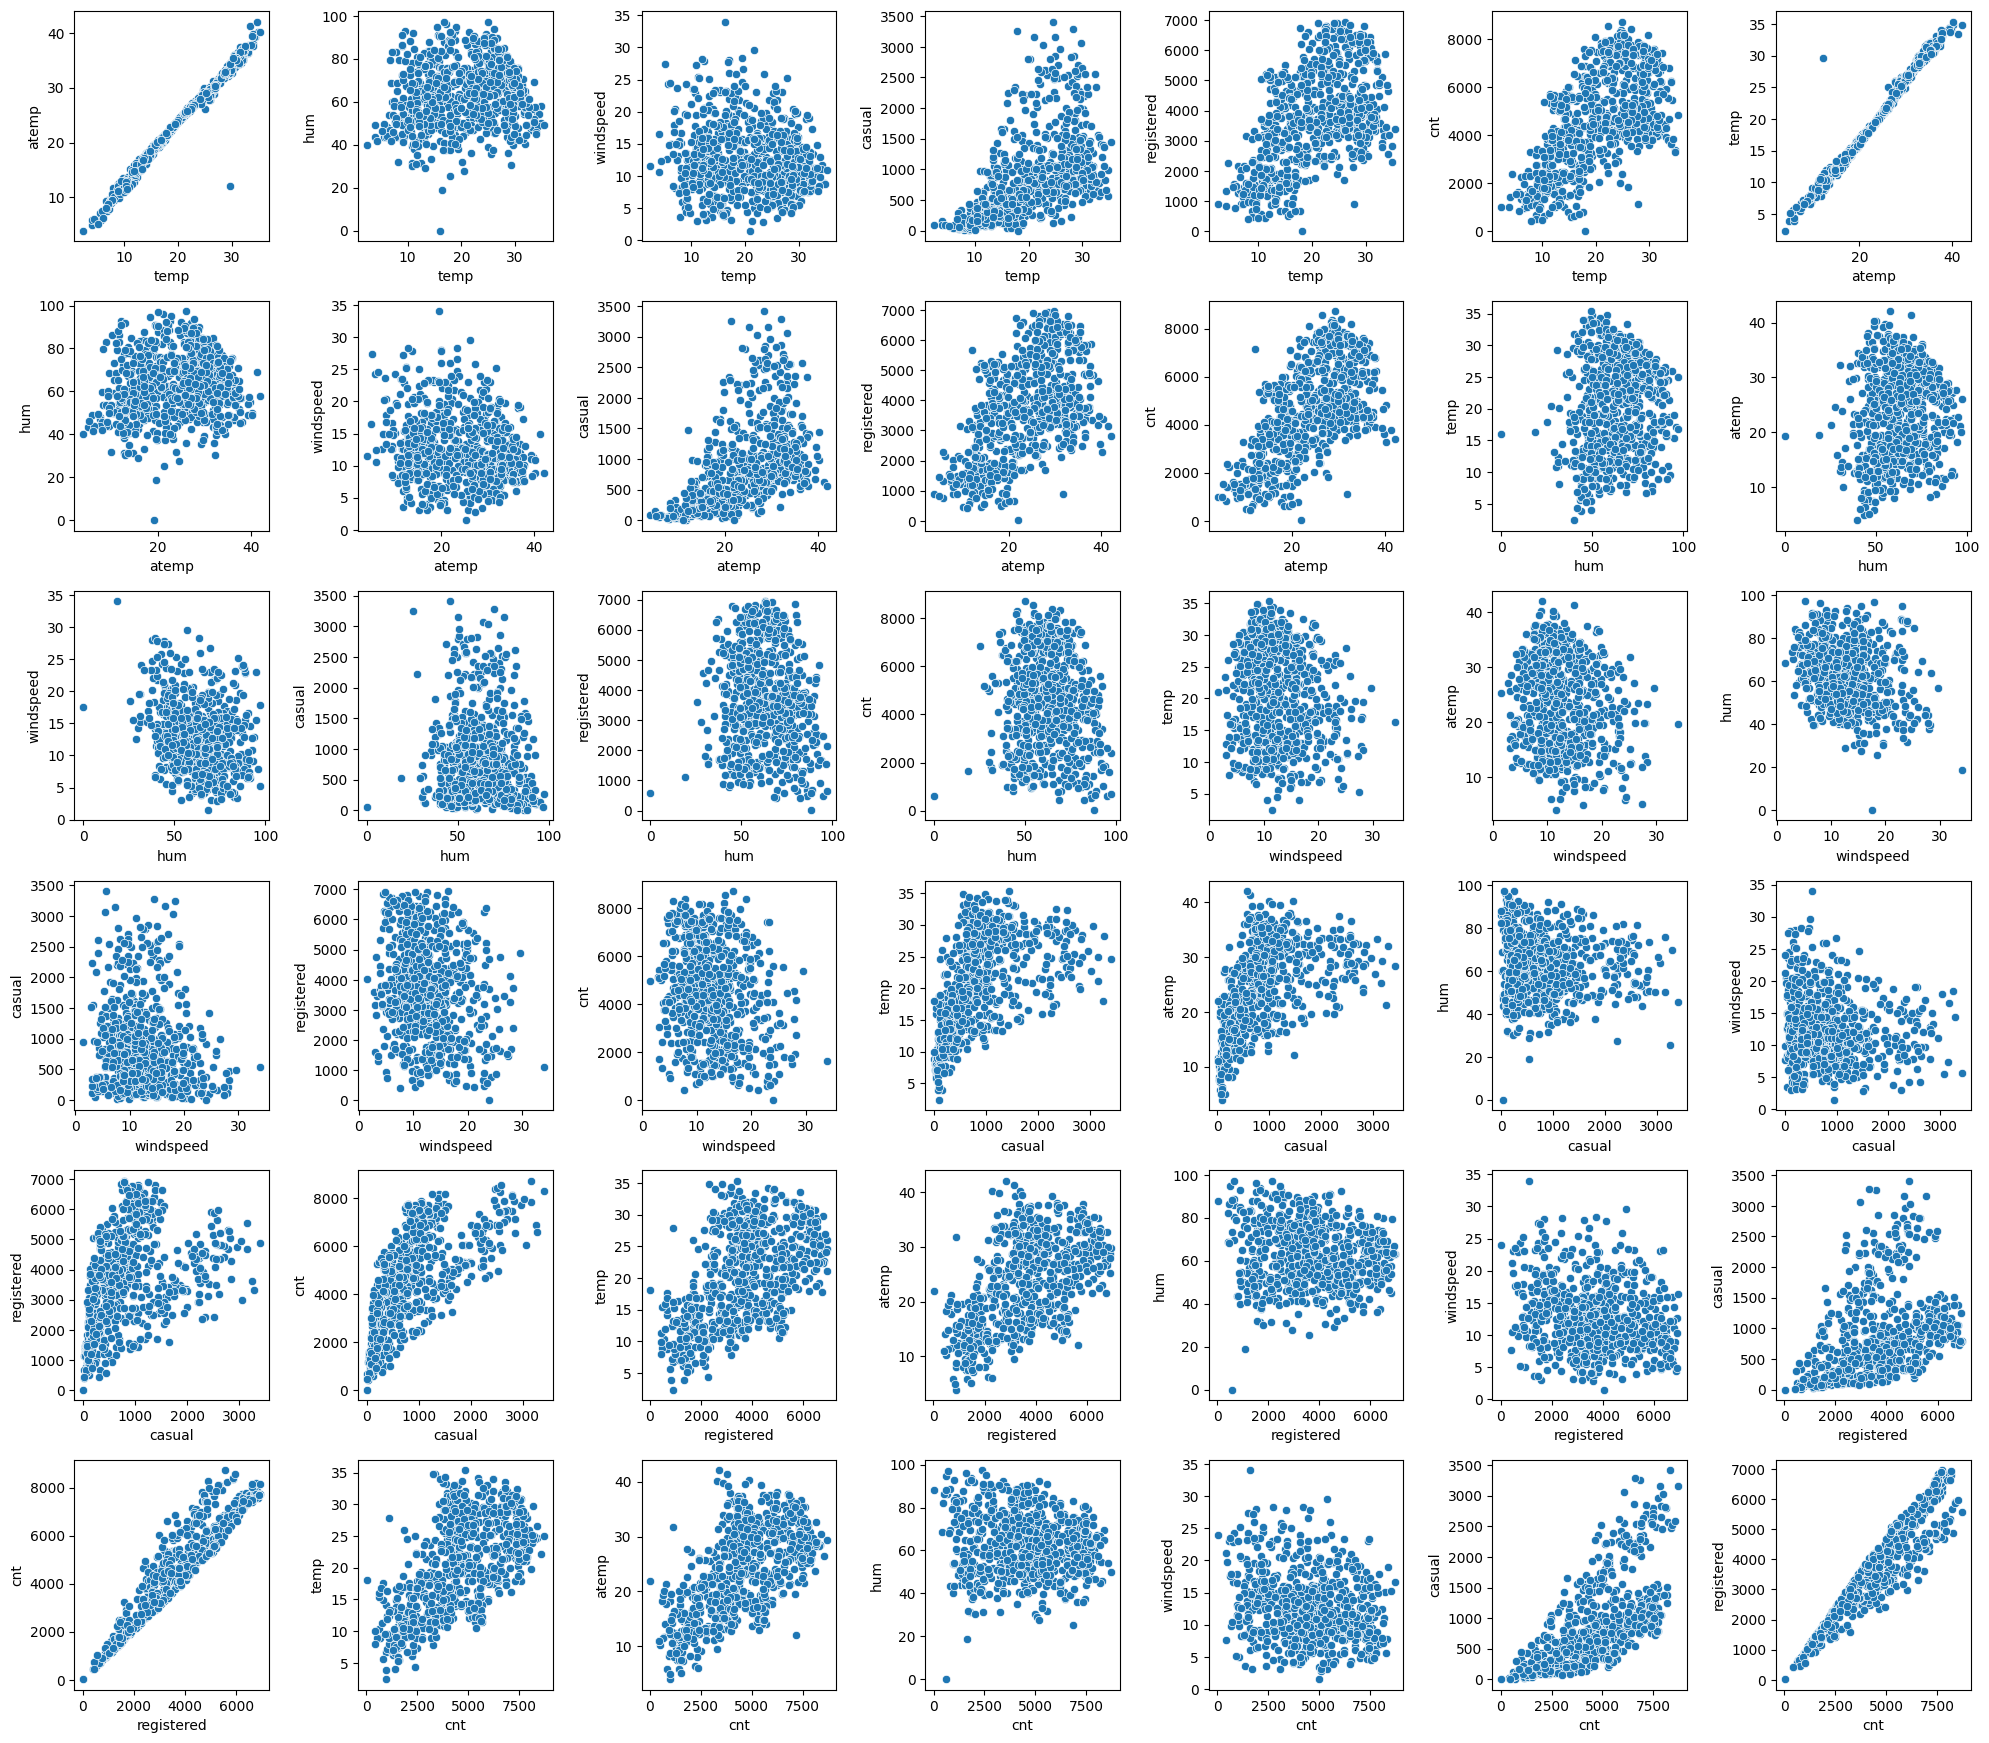

In [313]:
# 3. Numerical vs. Numerical
plt.figure(figsize=(20, 20))
plot_index = 1

for col1 in numerical_cols:
    for col2 in numerical_cols:
        if col1 != col2:
            plt.subplot(len(numerical_cols), len(numerical_cols), plot_index)
            sns.scatterplot(x=col1, y=col2, data=boomBikes)
            plt.xlabel(col1)
            plt.ylabel(col2)
            plot_index += 1

plt.tight_layout()
plt.show()

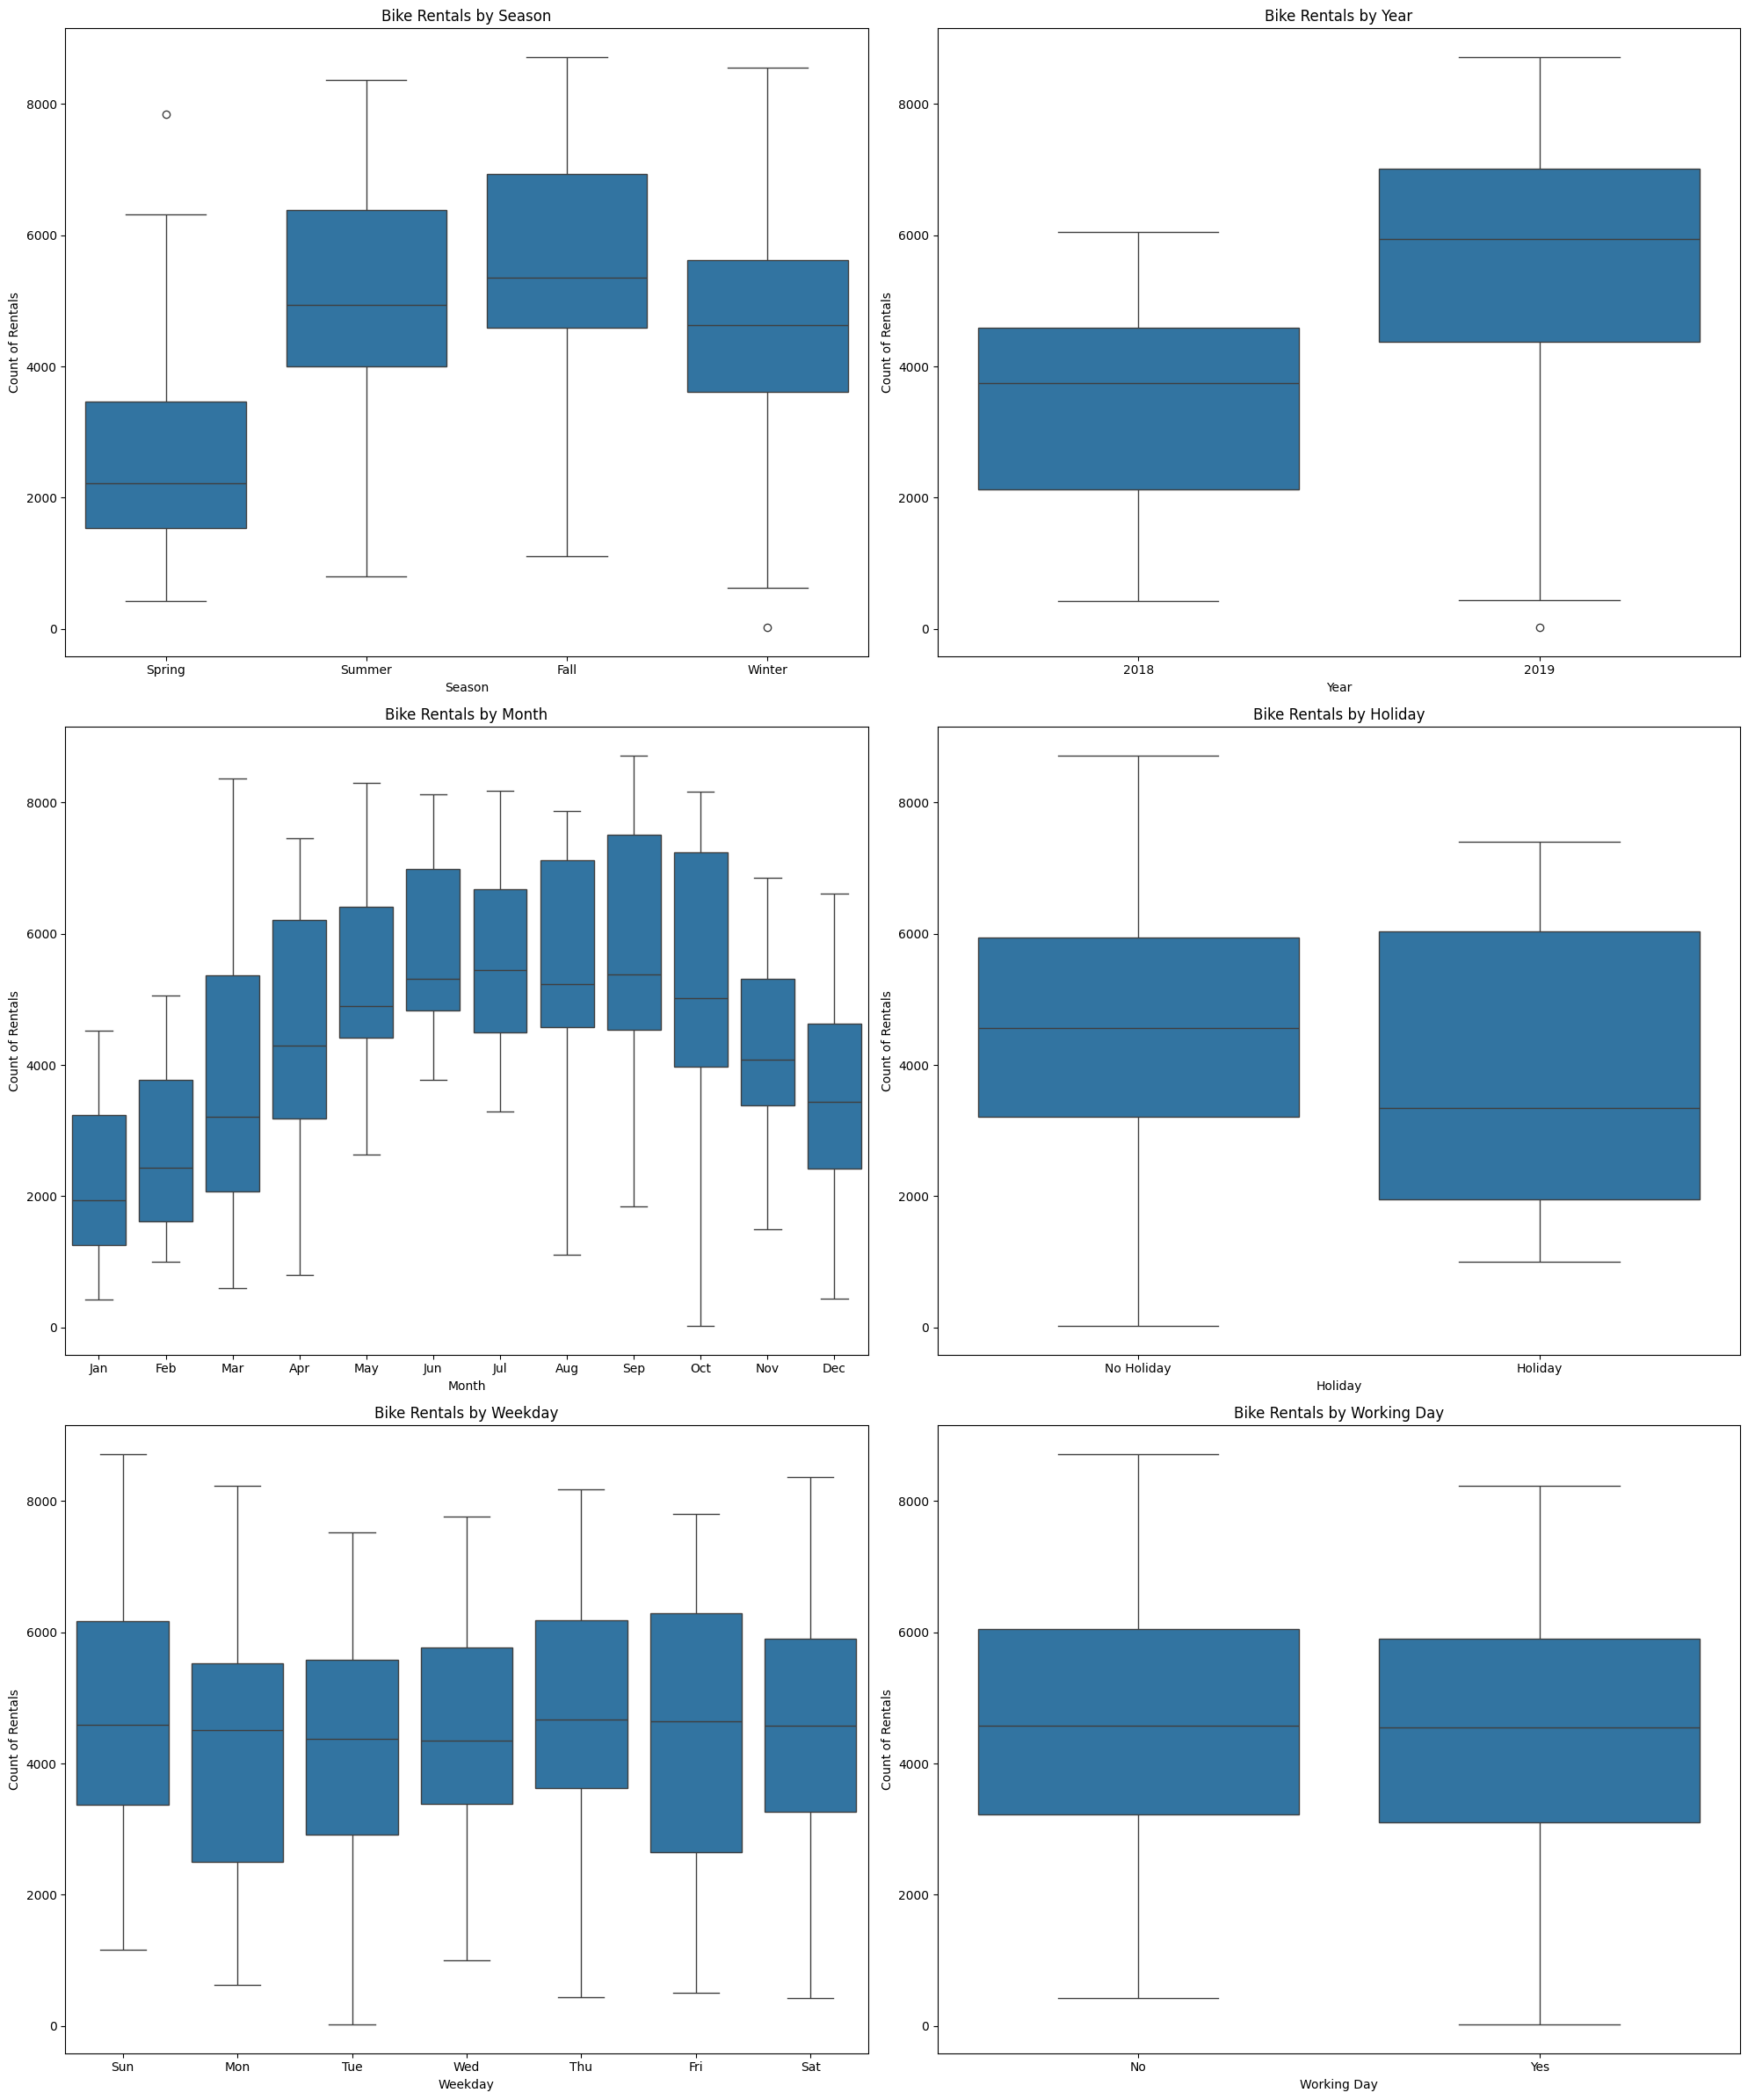

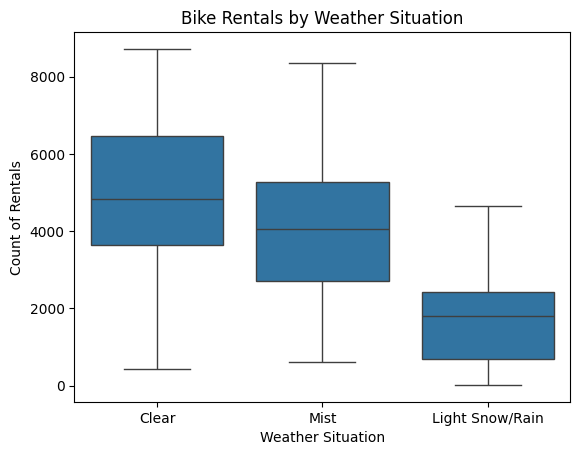

In [314]:
# relation between cnt to all coumns ( Categorical vs. Numerical )
season_labels = {1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'}
year_labels = {0: '2018', 1: '2019'}
month_labels = {1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun', 7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'}
holiday_labels = {0: 'No Holiday', 1: 'Holiday'}
weekday_labels = {0: 'Sun', 1: 'Mon', 2: 'Tue', 3: 'Wed', 4: 'Thu', 5: 'Fri', 6: 'Sat'}
workingday_labels = {0: 'No', 1: 'Yes'}
weathersit_labels = {1: 'Clear', 2: 'Mist', 3: 'Light Snow/Rain', 4: 'Heavy'}

# Create the plots
plt.figure(figsize=(20, 24))

# Season
plt.subplot(3, 2, 1)
boxplot = sns.boxplot(x='season', y='cnt', data=boomBikes)
boxplot.set_xticklabels([season_labels[i] for i in sorted(season_labels.keys())])
plt.title('Bike Rentals by Season')
plt.xlabel('Season')
plt.ylabel('Count of Rentals')

# Year
plt.subplot(3, 2, 2)
boxplot = sns.boxplot(x='yr', y='cnt', data=boomBikes)
boxplot.set_xticklabels([year_labels[i] for i in sorted(year_labels.keys())])
plt.title('Bike Rentals by Year')
plt.xlabel('Year')
plt.ylabel('Count of Rentals')

# Month
plt.subplot(3, 2, 3)
boxplot = sns.boxplot(x='mnth', y='cnt', data=boomBikes)
boxplot.set_xticklabels([month_labels[i] for i in sorted(month_labels.keys())])
plt.title('Bike Rentals by Month')
plt.xlabel('Month')
plt.ylabel('Count of Rentals')

# Holiday
plt.subplot(3, 2, 4)
boxplot = sns.boxplot(x='holiday', y='cnt', data=boomBikes)
boxplot.set_xticklabels([holiday_labels[i] for i in sorted(holiday_labels.keys())])
plt.title('Bike Rentals by Holiday')
plt.xlabel('Holiday')
plt.ylabel('Count of Rentals')

# Weekday
plt.subplot(3, 2, 5)
boxplot = sns.boxplot(x='weekday', y='cnt', data=boomBikes)
boxplot.set_xticklabels([weekday_labels[i] for i in sorted(weekday_labels.keys())])
plt.title('Bike Rentals by Weekday')
plt.xlabel('Weekday')
plt.ylabel('Count of Rentals')

# Workingday
plt.subplot(3, 2, 6)
boxplot = sns.boxplot(x='workingday', y='cnt', data=boomBikes)
boxplot.set_xticklabels([workingday_labels[i] for i in sorted(workingday_labels.keys())])
plt.title('Bike Rentals by Working Day')
plt.xlabel('Working Day')
plt.ylabel('Count of Rentals')

# Adjust layout
plt.tight_layout()
plt.show()

# Additional plot for weathersit
# plt.figure(figsize=(20, 12))
boxplot = sns.boxplot(x='weathersit', y='cnt', data=boomBikes)
boxplot.set_xticklabels([weathersit_labels[i] for i in sorted(weathersit_labels.keys())])
plt.title('Bike Rentals by Weather Situation')
plt.xlabel('Weather Situation')
plt.ylabel('Count of Rentals')
plt.show()

# Multivariate Analysis


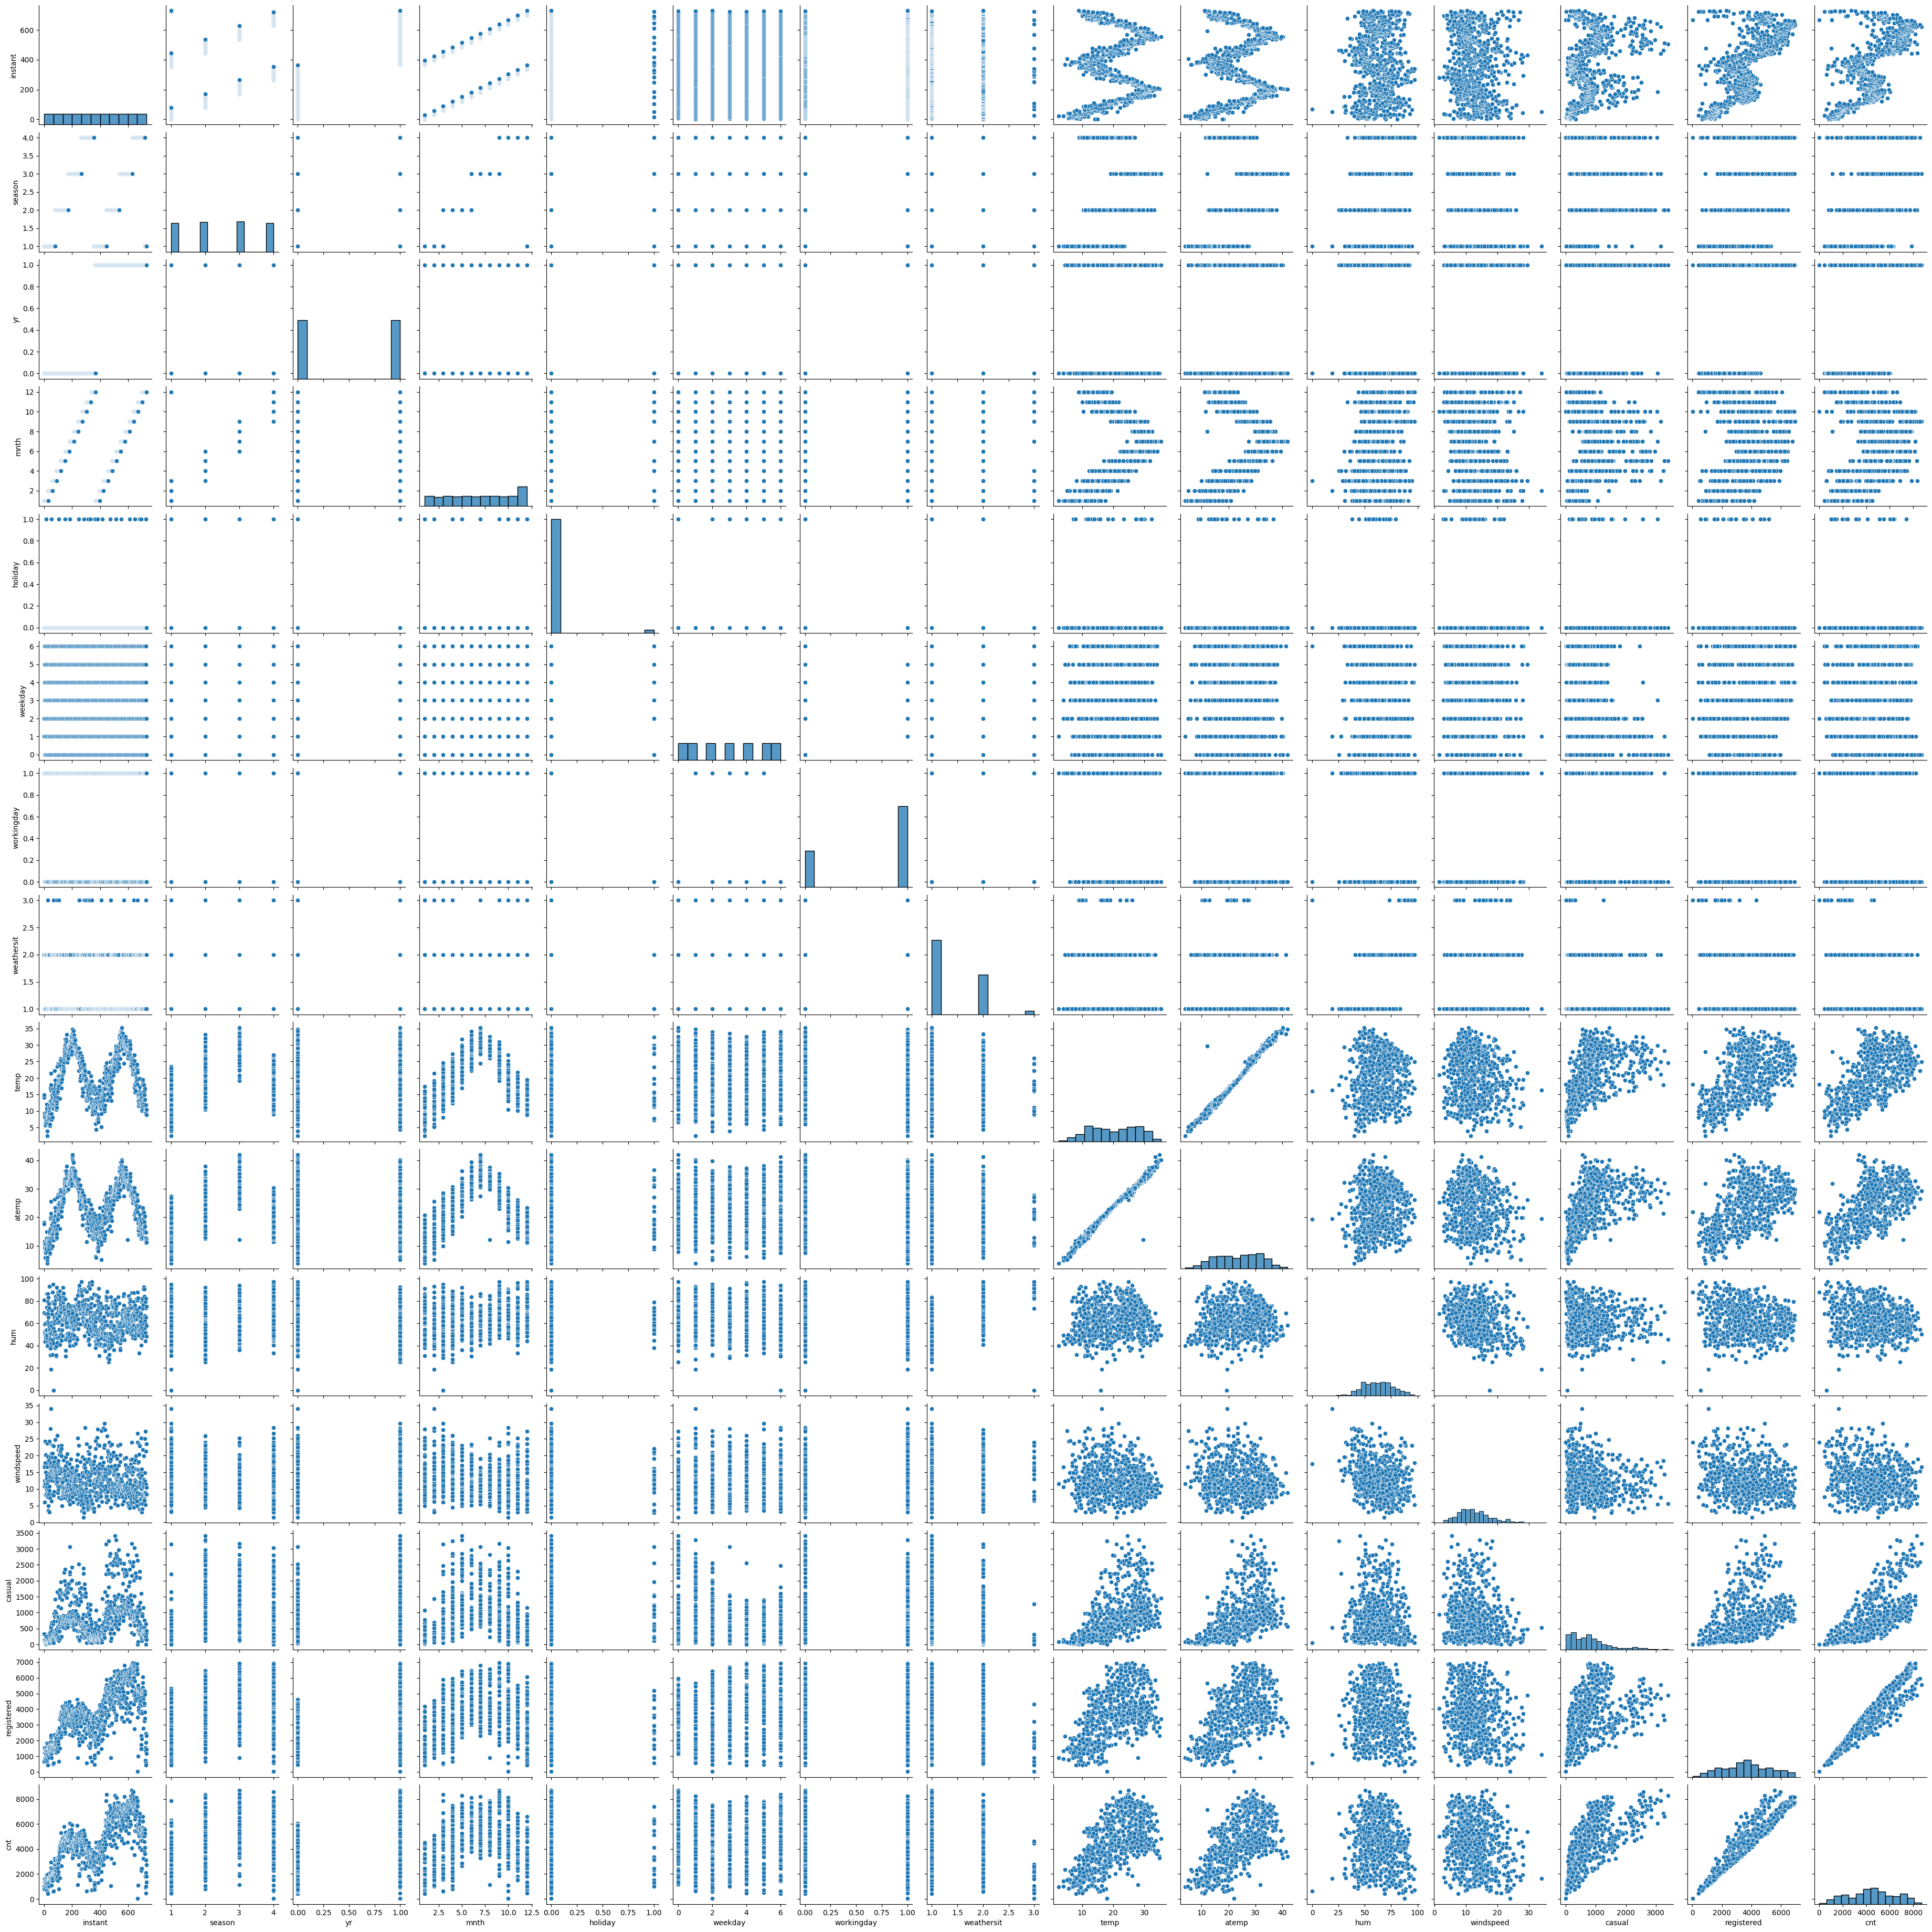

In [315]:
sns.pairplot(boomBikes)
plt.show()

#Step 3: Pre Processing

In [316]:
# Removing unnecessary columns ('instant', 'dteday', 'casual', 'registered') from the boomBikes DataFrame
boomBikesAfterDrop = boomBikes.drop(columns=['instant', 'dteday', 'casual', 'registered'])

In [317]:
boomBikesAfterDrop.head()

season  yr  mnth  holiday  weekday  workingday  weathersit       temp  \
0       1   0     1        0        1           1           2  14.110847   
1       1   0     1        0        2           1           2  14.902598   
2       1   0     1        0        3           1           1   8.050924   
3       1   0     1        0        4           1           1   8.200000   
4       1   0     1        0        5           1           1   9.305237   

      atemp      hum  windspeed   cnt  
0  18.18125  80.5833  10.749882   985  
1  17.68695  69.6087  16.652113   801  
2   9.47025  43.7273  16.636703  1349  
3  10.60610  59.0435  10.739832  1562  
4  11.46350  43.6957  12.522300  1600

In [318]:
# Assuming 'data' is your DataFrame
# Initialize an empty list to store columns with non-binary categorical values
categorical_cols = ['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']
binary_cols = []

unique_values = {}
for col in boomBikesAfterDrop[categorical_cols]:
    unique_vals = boomBikesAfterDrop[col].unique()
    if set(unique_vals) == {0, 1}:
        # If the column contains only 0 and 1 values, skip it
        continue
    else:
        # If the column contains other values, append its name to the binary_cols list
        binary_cols.append(col)
        unique_values[col] = unique_vals

print("Columns with non-binary categorical values:", binary_cols)
print("Unique values for each column:")
print(unique_values)


Columns with non-binary categorical values: ['season', 'mnth', 'weekday', 'weathersit']
Unique values for each column:
{'season': array([1, 2, 3, 4]), 'mnth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]), 'weekday': array([1, 2, 3, 4, 5, 6, 0]), 'weathersit': array([2, 1, 3])}


In [319]:
binary_cols

['season', 'mnth', 'weekday', 'weathersit']

# Dummy Variables

In [320]:

for col in binary_cols:
    boomBikesAfterDrop[col] = boomBikesAfterDrop[col].astype('category')

status = pd.get_dummies(boomBikesAfterDrop[binary_cols],dtype=int, drop_first=True)


In [321]:
bikes  = pd.concat([boomBikesAfterDrop, status], axis = 1)

In [322]:
bikes.head()

season  yr mnth  holiday weekday  workingday weathersit       temp  \
0      1   0    1        0       1           1          2  14.110847   
1      1   0    1        0       2           1          2  14.902598   
2      1   0    1        0       3           1          1   8.050924   
3      1   0    1        0       4           1          1   8.200000   
4      1   0    1        0       5           1          1   9.305237   

      atemp      hum  ...  mnth_11  mnth_12  weekday_1  weekday_2  weekday_3  \
0  18.18125  80.5833  ...        0        0          1          0          0   
1  17.68695  69.6087  ...        0        0          0          1          0   
2   9.47025  43.7273  ...        0        0          0          0          1   
3  10.60610  59.0435  ...        0        0          0          0          0   
4  11.46350  43.6957  ...        0        0          0          0          0   

   weekday_4  weekday_5  weekday_6  weathersit_2  weathersit_3  
0          0          0          0             1             0  
1          0          0          0             1             0  
2          0          0          0             0             0  
3          1          0          0             0             0  
4          0          1          0             0             0  

[5 rows x 34 columns]

In [323]:
#then drop main varibales
bickDf=bikes.drop(columns=binary_cols)

In [324]:
bickDf.head()

yr  holiday  workingday       temp     atemp      hum  windspeed   cnt  \
0   0        0           1  14.110847  18.18125  80.5833  10.749882   985   
1   0        0           1  14.902598  17.68695  69.6087  16.652113   801   
2   0        0           1   8.050924   9.47025  43.7273  16.636703  1349   
3   0        0           1   8.200000  10.60610  59.0435  10.739832  1562   
4   0        0           1   9.305237  11.46350  43.6957  12.522300  1600   

   season_2  season_3  ...  mnth_11  mnth_12  weekday_1  weekday_2  weekday_3  \
0         0         0  ...        0        0          1          0          0   
1         0         0  ...        0        0          0          1          0   
2         0         0  ...        0        0          0          0          1   
3         0         0  ...        0        0          0          0          0   
4         0         0  ...        0        0          0          0          0   

   weekday_4  weekday_5  weekday_6  weathersit_2  weathersit_3  
0          0          0          0             1             0  
1          0          0          0             1             0  
2          0          0          0             0             0  
3          1          0          0             0             0  
4          0          1          0             0             0  

[5 rows x 30 columns]

# Step 4: Splitting the Data into Training and Testing Sets

In [325]:
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train, df_test = train_test_split(bickDf, train_size = 0.7, test_size = 0.3, random_state = 100)

In [326]:
#apply only non category columns
numerical_cols = ['temp', 'atemp', 'hum', 'windspeed', 'cnt']
from sklearn.preprocessing import MinMaxScaler

In [327]:
scaler = MinMaxScaler()

In [328]:
df_train[numerical_cols] = scaler.fit_transform(df_train[numerical_cols])

In [329]:
df_train.head()

yr  holiday  workingday      temp     atemp       hum  windspeed  \
653   1        0           1  0.509887  0.501133  0.575354   0.300794   
576   1        0           1  0.815169  0.766351  0.725633   0.264686   
426   1        0           0  0.442393  0.438975  0.640189   0.255342   
728   1        0           1  0.245101  0.200348  0.498067   0.663106   
482   1        0           0  0.395666  0.391735  0.504508   0.188475   

          cnt  season_2  season_3  ...  mnth_11  mnth_12  weekday_1  \
653  0.864243         0         0  ...        0        0          0   
576  0.827658         0         1  ...        0        0          0   
426  0.465255         0         0  ...        0        0          0   
728  0.204096         0         0  ...        0        1          1   
482  0.482973         1         0  ...        0        0          0   

     weekday_2  weekday_3  weekday_4  weekday_5  weekday_6  weathersit_2  \
653          0          1          0          0          0             0   
576          0          1          0          0          0             0   
426          0          0          0          0          0             1   
728          0          0          0          0          0             0   
482          0          0          0          0          0             1   

     weathersit_3  
653             0  
576             0  
426             0  
728             0  
482             0  

[5 rows x 30 columns]

In [330]:
df_train.describe()

yr     holiday  workingday        temp       atemp         hum  \
count  510.000000  510.000000  510.000000  510.000000  510.000000  510.000000   
mean     0.507843    0.025490    0.711765    0.537262    0.512989    0.650369   
std      0.500429    0.157763    0.453386    0.225844    0.212385    0.145882   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.000000    0.000000    0.339853    0.332086    0.538643   
50%      1.000000    0.000000    1.000000    0.540519    0.526811    0.653714   
75%      1.000000    0.000000    1.000000    0.735215    0.688457    0.754830   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

        windspeed         cnt    season_2    season_3  ...     mnth_11  \
count  510.000000  510.000000  510.000000  510.000000  ...  510.000000   
mean     0.320768    0.513620    0.245098    0.262745  ...    0.086275   
std      0.169797    0.224593    0.430568    0.440557  ...    0.281045   
min      0.000000    0.000000    0.000000    0.000000  ...    0.000000   
25%      0.199179    0.356420    0.000000    0.000000  ...    0.000000   
50%      0.296763    0.518638    0.000000    0.000000  ...    0.000000   
75%      0.414447    0.684710    0.000000    1.000000  ...    0.000000   
max      1.000000    1.000000    1.000000    1.000000  ...    1.000000   

          mnth_12   weekday_1   weekday_2   weekday_3   weekday_4   weekday_5  \
count  510.000000  510.000000  510.000000  510.000000  510.000000  510.000000   
mean     0.084314    0.154902    0.152941    0.135294    0.143137    0.147059   
std      0.278131    0.362166    0.360284    0.342373    0.350557    0.354512   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
50%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
75%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

        weekday_6  weathersit_2  weathersit_3  
count  510.000000    510.000000    510.000000  
mean     0.129412      0.343137      0.029412  
std      0.335985      0.475223      0.169124  
min      0.000000      0.000000      0.000000  
25%      0.000000      0.000000      0.000000  
50%      0.000000      0.000000      0.000000  
75%      0.000000      1.000000      0.000000  
max      1.000000      1.000000      1.000000  

[8 rows x 30 columns]

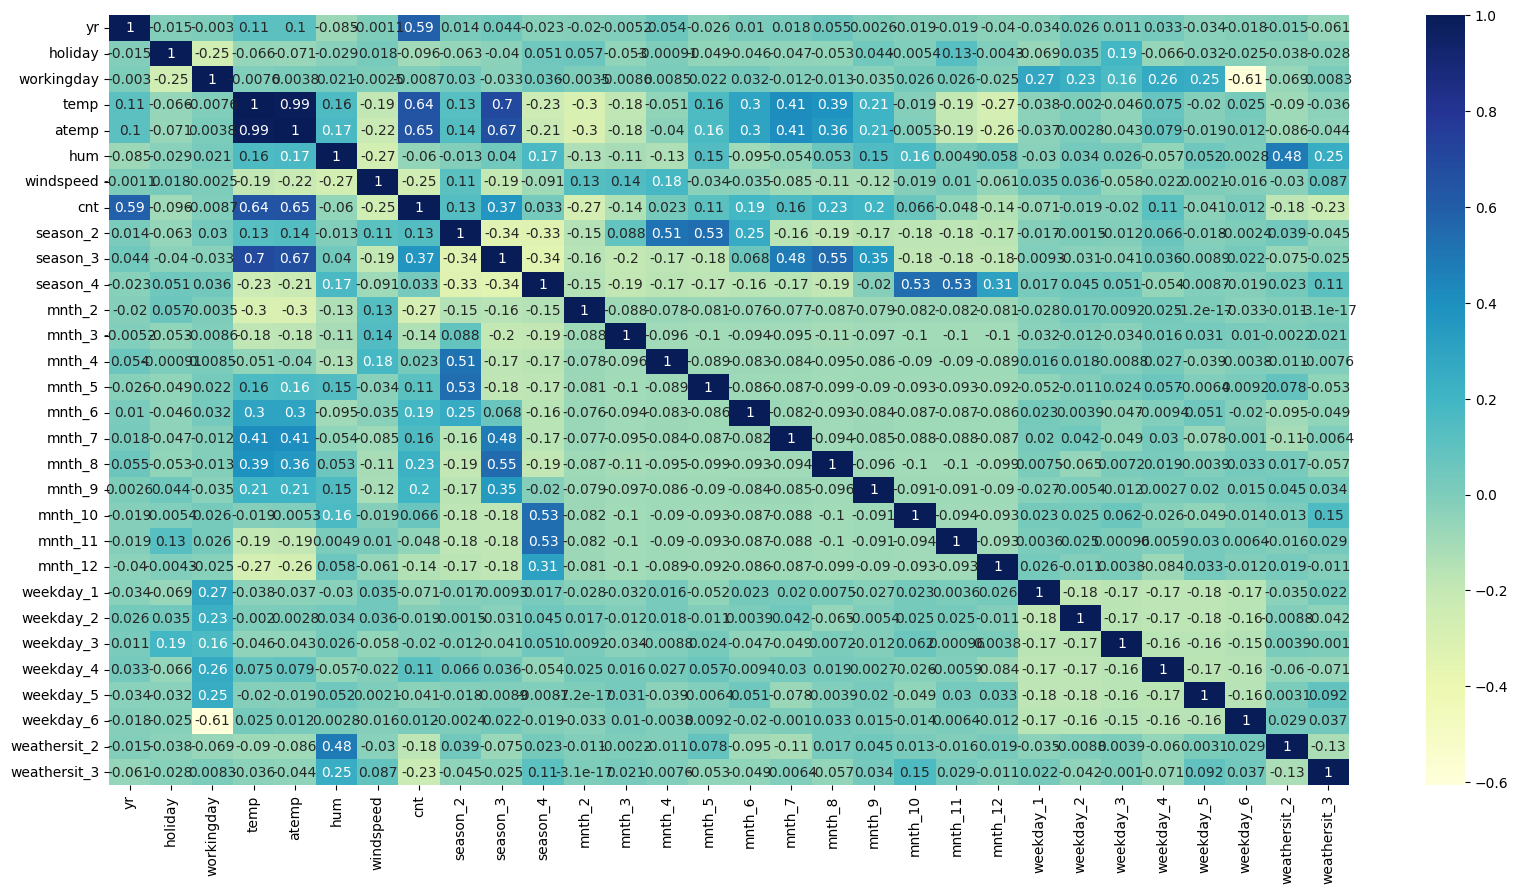

In [331]:
plt.figure(figsize = (20, 10))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

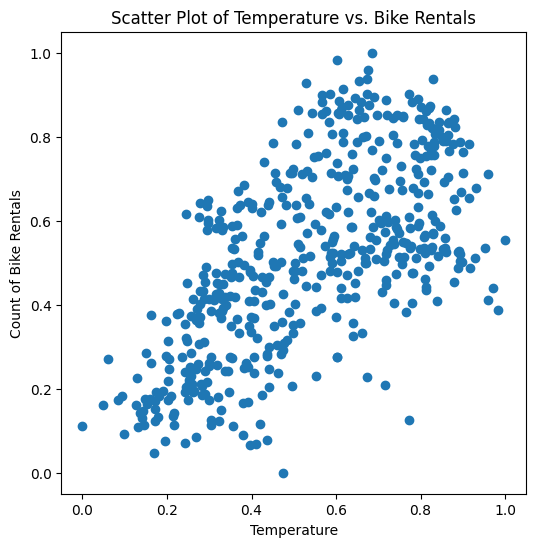

In [332]:
plt.figure(figsize=[6,6])
plt.scatter(df_train.temp, df_train.cnt)
plt.xlabel('Temperature')
plt.ylabel('Count of Bike Rentals')
plt.title('Scatter Plot of Temperature vs. Bike Rentals')
plt.show()

## Step 5: Building a linear model

In [333]:
# Dividing into X and Y sets for the model building
y_train = df_train.pop('cnt')
X_train = df_train

# Adding column 1

In [334]:
import statsmodels.api as sm

# Add a constant
X_train_lm = sm.add_constant(X_train[['temp']])

# Create a first fitted model
lr_1 = sm.OLS(y_train, X_train_lm).fit()

In [335]:
lr_1.params

const    0.169798
temp     0.639952
dtype: float64

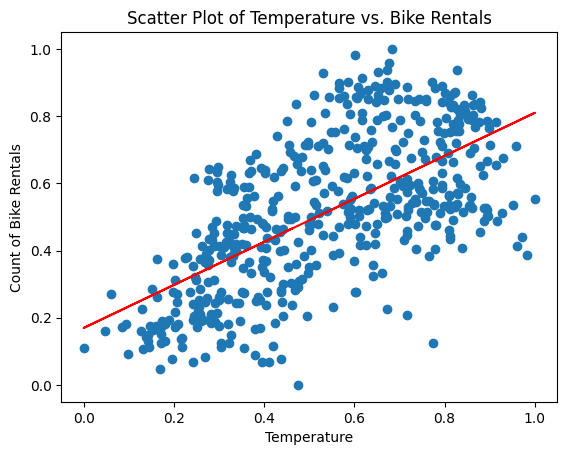

In [336]:
# Let's visualise the data with a scatter plot and the fitted regression line
plt.scatter(X_train_lm.iloc[:, 1], y_train)
plt.plot(X_train_lm.iloc[:, 1], 0.169798 +0.639952*X_train_lm.iloc[:, 1], 'r')
plt.xlabel('Temperature')
plt.ylabel('Count of Bike Rentals')
plt.title('Scatter Plot of Temperature vs. Bike Rentals')
plt.show()

In [337]:
# Print a summary of the linear regression first model obtained
print(lr_1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.414
Model:                            OLS   Adj. R-squared:                  0.413
Method:                 Least Squares   F-statistic:                     359.1
Date:                Sat, 08 Jun 2024   Prob (F-statistic):           5.80e-61
Time:                        09:09:38   Log-Likelihood:                 174.84
No. Observations:                 510   AIC:                            -345.7
Df Residuals:                     508   BIC:                            -337.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1698      0.020      8.628      0.0

# Adding column 2

In [338]:
# Assign all the feature variables to X
X_train_lm = X_train[['temp', 'atemp']]

In [339]:
# Build a linear model

import statsmodels.api as sm
X_train_lm = sm.add_constant(X_train_lm)

lr_2 = sm.OLS(y_train, X_train_lm).fit()

lr_2.params

const    0.163383
temp     0.181818
atemp    0.492316
dtype: float64

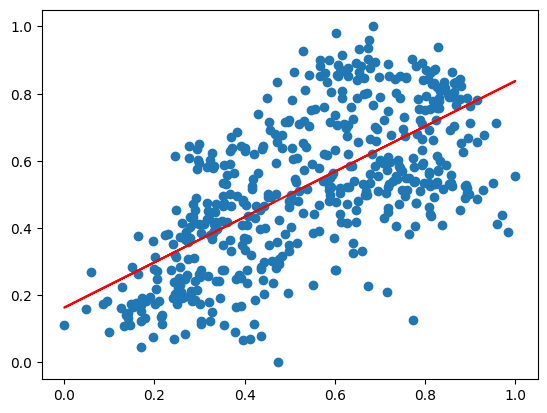

In [340]:
# Let's visualise the data with a scatter plot and the fitted regression line
plt.scatter(X_train_lm.iloc[:, 1], y_train)
plt.plot(X_train_lm.iloc[:, 1], 0.163383 +0.181818*X_train_lm.iloc[:, 1]+0.492316*X_train_lm.iloc[:, 1], 'r')
plt.show()

In [341]:
print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.419
Model:                            OLS   Adj. R-squared:                  0.416
Method:                 Least Squares   F-statistic:                     182.5
Date:                Sat, 08 Jun 2024   Prob (F-statistic):           1.95e-60
Time:                        09:09:38   Log-Likelihood:                 176.81
No. Observations:                 510   AIC:                            -347.6
Df Residuals:                     507   BIC:                            -334.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1634      0.020      8.215      0.0

# Adding column 3

In [342]:
# Assign all the feature variables to X
X_train_lm = X_train[['temp', 'atemp','hum']]

In [343]:
# Build a linear model

import statsmodels.api as sm
X_train_lm = sm.add_constant(X_train_lm)

lr_3 = sm.OLS(y_train, X_train_lm).fit()

lr_3.params

const    0.320935
temp     0.080066
atemp    0.630482
hum     -0.267176
dtype: float64

In [344]:
print(lr_3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.448
Model:                            OLS   Adj. R-squared:                  0.444
Method:                 Least Squares   F-statistic:                     136.7
Date:                Sat, 08 Jun 2024   Prob (F-statistic):           7.24e-65
Time:                        09:09:38   Log-Likelihood:                 189.88
No. Observations:                 510   AIC:                            -371.8
Df Residuals:                     506   BIC:                            -354.8
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3209      0.036      8.868      0.0

# Adding column 4

In [345]:
# Assign all the feature variables to X
X_train_lm = X_train[['temp', 'atemp','hum','windspeed']]

In [346]:
# Build a linear model

import statsmodels.api as sm
X_train_lm = sm.add_constant(X_train_lm)

lr_4 = sm.OLS(y_train, X_train_lm).fit()

lr_4.params

const        0.454823
temp         0.276113
atemp        0.390559
hum         -0.328808
windspeed   -0.237101
dtype: float64

In [347]:
print(lr_4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.476
Model:                            OLS   Adj. R-squared:                  0.472
Method:                 Least Squares   F-statistic:                     114.6
Date:                Sat, 08 Jun 2024   Prob (F-statistic):           1.85e-69
Time:                        09:09:38   Log-Likelihood:                 203.18
No. Observations:                 510   AIC:                            -396.4
Df Residuals:                     505   BIC:                            -375.2
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4548      0.044     10.412      0.0

# Adding all the variables to the model

In [348]:
import statsmodels.api as sm
X_train_lm = sm.add_constant(X_train)

lr_all = sm.OLS(y_train, X_train_lm).fit()

lr_all.params

const           0.236909
yr              0.230933
holiday        -0.135245
workingday     -0.060878
temp            0.400268
atemp           0.046419
hum            -0.157757
windspeed      -0.181137
season_2        0.085854
season_3        0.044097
season_4        0.154579
mnth_2          0.026274
mnth_3          0.064256
mnth_4          0.063451
mnth_5          0.088216
mnth_6          0.065595
mnth_7          0.029539
mnth_8          0.086485
mnth_9          0.150171
mnth_10         0.069373
mnth_11         0.021921
mnth_12         0.017765
weekday_1       0.025639
weekday_2       0.023966
weekday_3       0.039061
weekday_4       0.054148
weekday_5       0.050307
weekday_6      -0.006002
weathersit_2   -0.059311
weathersit_3   -0.250902
dtype: float64

In [349]:
print(lr_all.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     94.48
Date:                Sat, 08 Jun 2024   Prob (F-statistic):          4.09e-178
Time:                        09:09:38   Log-Likelihood:                 523.87
No. Observations:                 510   AIC:                            -987.7
Df Residuals:                     480   BIC:                            -860.7
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2369      0.030      7.841   

# Step :6 Checking VIF

In [350]:
# Check for the VIF values of the feature variables.
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [351]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features     VIF
3           temp  447.16
4          atemp  382.06
2     workingday  229.51
21     weekday_1   50.79
22     weekday_2   49.62
25     weekday_5   48.17
24     weekday_4   47.10
23     weekday_3   43.28
5            hum   22.74
8       season_3   15.43
16        mnth_8   11.08
9       season_4   10.97
15        mnth_7    9.70
7       season_2    8.90
14        mnth_6    7.41
17        mnth_9    7.37
13        mnth_5    7.18
1        holiday    6.95
18       mnth_10    6.66
19       mnth_11    6.04
12        mnth_4    5.67
6      windspeed    4.69
20       mnth_12    3.79
11        mnth_3    3.06
27  weathersit_2    2.29
0             yr    2.09
26     weekday_6    1.84
10        mnth_2    1.71
28  weathersit_3    1.24

In [352]:
# We generally want a VIF that is less than 5. So there are clearly some variables we need to drop.?

# Stop: 7 Dropping the variable and updating the model

In [353]:
# Dropping highly correlated variables and insignificant variables

X = X_train.drop('weekday_6', axis=1)

In [354]:
# Build a third fitted model
X_train_lm = sm.add_constant(X)

lr_r1 = sm.OLS(y_train, X_train_lm).fit()

In [355]:
print(lr_r1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     98.03
Date:                Sat, 08 Jun 2024   Prob (F-statistic):          4.41e-179
Time:                        09:09:38   Log-Likelihood:                 523.79
No. Observations:                 510   AIC:                            -989.6
Df Residuals:                     481   BIC:                            -866.8
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2339      0.029      8.018   

# Removeing more then 0.5 p value columns 2

In [356]:
high_vif_columns = ['weekday_1', 'weekday_2', 'weekday_5', 'weekday_4', 'weekday_3','weekday_6']
X = X_train.drop(high_vif_columns, axis=1)
# Print the summary of the model
# Build a third fitted model
X_train_lm = sm.add_constant(X)

lr_r2 = sm.OLS(y_train, X_train_lm).fit()
print(lr_r2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     118.4
Date:                Sat, 08 Jun 2024   Prob (F-statistic):          1.27e-182
Time:                        09:09:38   Log-Likelihood:                 519.91
No. Observations:                 510   AIC:                            -991.8
Df Residuals:                     486   BIC:                            -890.2
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2349      0.029      8.067   

# Removeing more then 0.5 p value columns 3

In [357]:
high_vif_columns = ['weekday_1', 'weekday_2', 'weekday_5', 'weekday_4', 'weekday_3','mnth_11','mnth_12','mnth_7']
X = X_train.drop(high_vif_columns, axis=1)
# Print the summary of the model
# Build a third fitted model
X_train_lm = sm.add_constant(X)

lr_2 = sm.OLS(y_train, X_train_lm).fit()
print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     130.2
Date:                Sat, 08 Jun 2024   Prob (F-statistic):          1.08e-184
Time:                        09:09:38   Log-Likelihood:                 519.80
No. Observations:                 510   AIC:                            -995.6
Df Residuals:                     488   BIC:                            -902.4
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2408      0.030      8.097   

# Removeing more then 0.5 p value columns 4

In [358]:
high_vif_columns = ['weekday_1', 'weekday_2', 'weekday_5','weekday_6', 'weekday_4', 'weekday_3','mnth_11','mnth_12','mnth_7','atemp']
X = X_train.drop(high_vif_columns, axis=1)
# Print the summary of the model
# Build a third fitted model
X_train_lm = sm.add_constant(X)

lr_r3 = sm.OLS(y_train, X_train_lm).fit()
print(lr_r3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     144.4
Date:                Sat, 08 Jun 2024   Prob (F-statistic):          8.75e-187
Time:                        09:09:38   Log-Likelihood:                 519.64
No. Observations:                 510   AIC:                            -999.3
Df Residuals:                     490   BIC:                            -914.6
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2376      0.029      8.292   

# Removeing more then 0.05 p value columns 5




In [359]:
high_vif_columns = ['weekday_1', 'weekday_2', 'weekday_5','weekday_6', 'weekday_4', 'weekday_3','mnth_3','mnth_4','mnth_5','mnth_6','mnth_8','mnth_11','mnth_12','mnth_7','atemp','season_3','season_4','workingday']
X = X_train.drop(high_vif_columns, axis=1)
# Print the summary of the model
# Build a third fitted model
X_train_lm = sm.add_constant(X)

lr_r4 = sm.OLS(y_train, X_train_lm).fit()
print(lr_r4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.805
Model:                            OLS   Adj. R-squared:                  0.801
Method:                 Least Squares   F-statistic:                     187.5
Date:                Sat, 08 Jun 2024   Prob (F-statistic):          4.06e-169
Time:                        09:09:39   Log-Likelihood:                 456.02
No. Observations:                 510   AIC:                            -888.0
Df Residuals:                     498   BIC:                            -837.2
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2786      0.030      9.239   

# Stop :8 Again checking VIF all categorys columns any more then 5

In [360]:
# Calculate the VIFs again for the new model
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
3            hum  12.48
2           temp   7.88
4      windspeed   3.72
9   weathersit_2   2.08
0             yr   2.01
5       season_2   1.53
7         mnth_9   1.23
8        mnth_10   1.22
6         mnth_2   1.20
10  weathersit_3   1.18
1        holiday   1.04

# Step 9: Residual Analysis of the train data

In [361]:
y_train_price = lr_r4.predict(X_train_lm)

Text(0.5, 0, 'Errors')

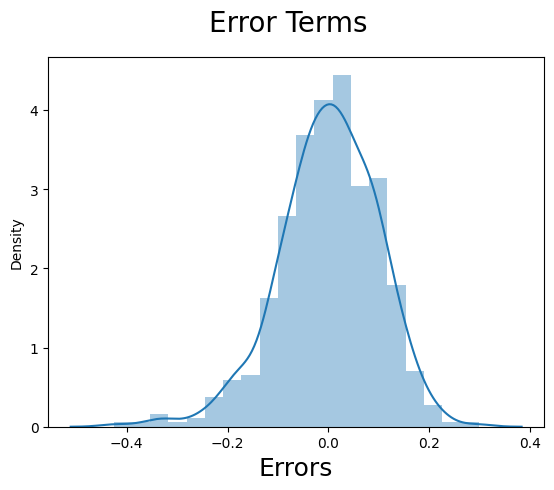

In [362]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading
plt.xlabel('Errors', fontsize = 18)                         # X-label

# Step 10: Making Predictions Using the Final Model

In [363]:
num_vars =['weekday_1', 'weekday_2', 'weekday_5','weekday_6', 'weekday_4', 'weekday_3','mnth_3','mnth_4','mnth_5','mnth_6','mnth_8','mnth_11','mnth_12','mnth_7','atemp','season_3','season_4','workingday']
# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Fit the scaler on the training set's numerical columns
scaler.fit(df_train[num_vars])

# Transform the numerical columns in the test set using the fitted scaler
df_test[num_vars] = scaler.transform(df_test[num_vars])

In [364]:
df_test.describe()

yr     holiday  workingday        temp       atemp         hum  \
count  219.000000  219.000000  219.000000  219.000000  219.000000  219.000000   
mean     0.479452    0.036530    0.639269   20.815737   24.255828   61.961883   
std      0.500722    0.188034    0.481313    7.689600    8.299641   14.456669   
min      0.000000    0.000000    0.000000    3.957390    4.941955   25.416700   
25%      0.000000    0.000000    0.000000   14.093750   17.085500   51.166700   
50%      0.000000    0.000000    1.000000   20.807500   24.873150   60.916700   
75%      1.000000    0.000000    1.000000   27.401653   31.155725   72.192050   
max      1.000000    1.000000    1.000000   34.815847   41.318550   97.250000   

        windspeed          cnt    season_2    season_3  ...     mnth_11  \
count  219.000000   219.000000  219.000000  219.000000  ...  219.000000   
mean    12.600130  4546.981735    0.264840    0.246575  ...    0.073059   
std      4.984858  1898.633630    0.442259    0.432005  ...    0.260830   
min      1.500244   441.000000    0.000000    0.000000  ...    0.000000   
25%      9.021282  3303.500000    0.000000    0.000000  ...    0.000000   
50%     12.167200  4579.000000    0.000000    0.000000  ...    0.000000   
75%     15.395629  5869.500000    1.000000    0.000000  ...    0.000000   
max     27.999836  8395.000000    1.000000    1.000000  ...    1.000000   

          mnth_12   weekday_1   weekday_2   weekday_3   weekday_4   weekday_5  \
count  219.000000  219.000000  219.000000  219.000000  219.000000  219.000000   
mean     0.086758    0.118721    0.123288    0.155251    0.141553    0.132420   
std      0.282125    0.324202    0.329520    0.362974    0.349389    0.339723   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
50%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
75%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

        weekday_6  weathersit_2  weathersit_3  
count  219.000000    219.000000    219.000000  
mean     0.173516      0.319635      0.027397  
std      0.379560      0.467403      0.163612  
min      0.000000      0.000000      0.000000  
25%      0.000000      0.000000      0.000000  
50%      0.000000      0.000000      0.000000  
75%      0.000000      1.000000      0.000000  
max      1.000000      1.000000      1.000000  

[8 rows x 30 columns]

In [365]:
y_test = df_test.pop('cnt')
X_test = df_test

In [366]:
# Adding constant variable to test dataframe
X_test_m4 = sm.add_constant(X_test)

In [367]:
# Creating X_test_m4 dataframe by dropping variables from X_test_m4

X_test_m4 = X_test_m4.drop(['weekday_1', 'weekday_2', 'weekday_5','weekday_6', 'weekday_4', 'weekday_3','mnth_3','mnth_4','mnth_5','mnth_6','mnth_8','mnth_11','mnth_12','mnth_7','atemp','season_3','season_4','workingday'], axis = 1)

In [368]:
# Making predictions using the fourth model

y_pred_m4 = lr_r4.predict(X_test_m4)

# Step 11: Model Evaluation

Text(0, 0.5, 'y_pred')

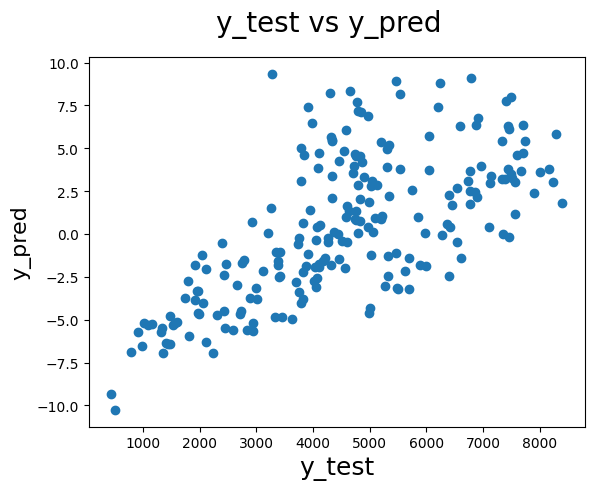

In [369]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred_m4)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)